In [1]:
import numpy as np
import time
import os
import sys
import scipy
import math
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scipy.interpolate import interp1d
import pandas as pd
import psutil
import json
from tqdm import tqdm
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import bigbadbrain as bbb
from scipy.linalg import toeplitz
import scipy.linalg as sl
from scipy.signal import convolve2d
from scipy.signal import convolve
import sklearn
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn import linear_model

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm

from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_19/func_0'

In [4]:
t0 = time.time()
save_file = os.path.join(directory, 'pca', 'scores_(spatial).npy')
pca_spatial = np.load(save_file)
save_file = os.path.join(directory, 'pca', 'loadings_(temporal).npy')
pca_loadings = np.load(save_file)
pca_spatial.shape = (4554, -1)
pca_spatial.shape = (4554, 128, 84, 49)
print('Duration: {}'.format(time.time()-t0))

Duration: 32.73711037635803


In [6]:
pca_loadings.shape

(4554, 4554)

In [5]:
from sklearn.manifold import TSNE

In [38]:
t0 = time.time()
X = TSNE(n_components=2,perplexity=100).fit_transform(pca_loadings[:,:100])
print('Duration: {:0.0f}s'.format(time.time()-t0))

Duration: 19s


In [45]:
X=embedded

(-50, 50)

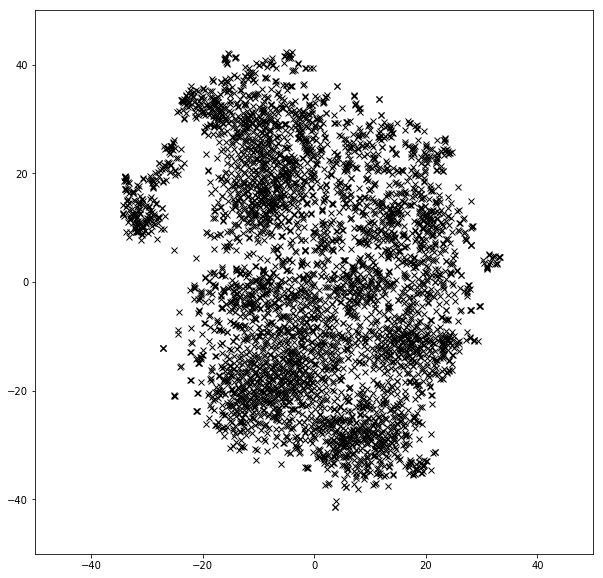

In [99]:
plt.figure(figsize=(10,10))
plt.plot(X[:,0],
         X[:,1],
         linestyle='None',
         color='k',
         marker='x')
plt.ylim(-50,50)
plt.xlim(-50,50)

In [122]:
import hdbscan
from random import randint
colors = []

for i in range(100):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [101]:
min_cluster_size=10
min_samples=10
cluster_selection_epsilon=1.8

t0 = time.time()
HDBSCAN = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                    min_samples=min_samples,
                                    cluster_selection_epsilon=cluster_selection_epsilon,
                                    cluster_selection_method='leaf').fit(X)
HDBSCAN.labels_ += 1
print('Duration: {:0.0f}s'.format(time.time()-t0))

Duration: 0s


In [105]:
len(HDBSCAN.labels_)

4554

In [ ]:
for i in range(12)

In [107]:
HDBSCAN.labels_[:400]

array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, 12, 12, 12, 12, 12, 12,  0, 12, 12,  0, 12,  0,
       12, 12, 12, 12, 12, 12,  0, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12,  0,  0,  0,  0,  0, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12,  0, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12

In [108]:
for i in range(13):
    print('{}, {}'.format(i, np.where(HDBSCAN.labels_ == i)[0].shape))

0, (883,)
1, (21,)
2, (47,)
3, (127,)
4, (11,)
5, (13,)
6, (13,)
7, (48,)
8, (33,)
9, (15,)
10, (11,)
11, (16,)
12, (3316,)


IndexError: list index out of range

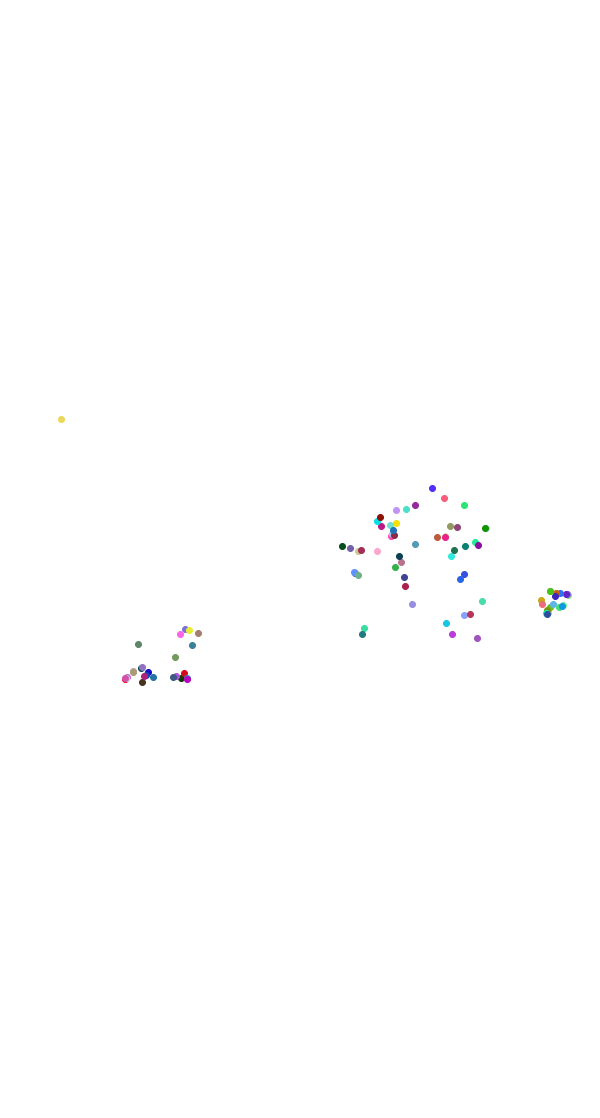

In [115]:
plt.figure(figsize=(10,20))

ax = plt.subplot()
for i in range(len(X[:,0])):
    if HDBSCAN.labels_[i] == 12:
        color='r'
    else:
        color='k'
    ax.plot(X[i,0],
            X[i,1],
            linestyle='None',
            marker='o',
            color=colors[i])
    ax.axis('equal')
    ax.axis('off')

In [171]:
HDBSCAN.labels_

array([ 0,  1,  1, ..., 20, 20, 20])

In [82]:
clusters[0].shape

(883, 2)

In [97]:
len(np.where(HDBSCAN.labels_ == 12)[0])

3316

In [95]:
print(HDBSCAN.labels_[:300])

[ 0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12 12
 12 12 12 12  0 12 12  0 12  0 12 12 12 12 12 12  0 12 12 12 12 12 12 12
 12 12 12 12 12 12  0  0  0  0  0 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12  0 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12  0 12 12
 12 12 12 12 12 12 12 12 12 12 12  0 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12  0 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12  0 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12  0
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12  0 12 12 12 12 12
 12 12 12 12 12 12 12 12 12  0 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12  0 12 12 12 12  0
 12 12 12 12 12 12 12 12 12 12 12 12]


In [63]:
for i in range(len(clusters)):
    print(clusters[i].shape)

(883, 2)
(21, 2)
(47, 2)
(127, 2)
(11, 2)
(13, 2)
(13, 2)
(48, 2)
(33, 2)
(15, 2)
(11, 2)
(16, 2)


In [65]:
for i in clusters:
    print(clusters[i].shape)

(883, 2)
(21, 2)
(47, 2)
(127, 2)
(11, 2)
(13, 2)
(13, 2)
(48, 2)
(33, 2)
(15, 2)
(11, 2)
(16, 2)


In [153]:
def cluster_and_plot(X, min_cluster_size, min_samples, cluster_selection_epsilon):
    t0 = time.time()
    HDBSCAN = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                    min_samples=min_samples,
                                    cluster_selection_epsilon=cluster_selection_epsilon,
                                    cluster_selection_method='leaf').fit(X)
    HDBSCAN.labels_ += 1
    print('Duration: {:0.0f}s'.format(time.time()-t0))

    clusters = {}
    for i in range(max(HDBSCAN.labels_)+1):
        indicies = np.where(HDBSCAN.labels_ == i)[0]
        clusters[i] = X[indicies,:]

    cluster_means = {}
    for i in range(max(HDBSCAN.labels_)+1):
        np.mean(clusters[i],axis=0)
        cluster_means[i] = np.mean(clusters[i],axis=0)

    plt.figure(figsize=(10,10))
    ax = plt.subplot()
    for i in clusters:
        plt.plot(clusters[i][:,0],clusters[i][:,1],linestyle='',marker='x',color=colors[i])
        
    print('{} clusters'.format(len(clusters)))
    return clusters
    #plt.scatter(cluster_means[i][0],cluster_means[i][1],color='white',s=300,zorder=1)
    #plt.text(cluster_means[i][0],cluster_means[i][1],str(i+1))
    #i=7
    #for i in range(12):
    #plt.plot(clusters[i][:,0],clusters[i][:,1],linestyle='',marker='x',color='k')

Duration: 0s
18 clusters


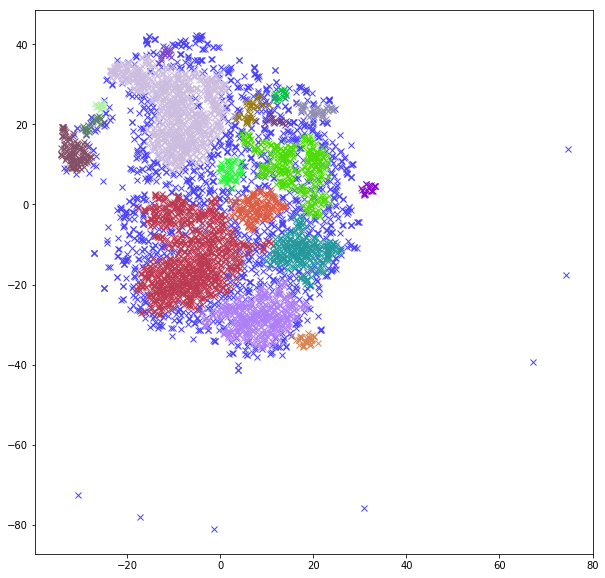

In [154]:
clusters = cluster_and_plot(X, 15, 10, 1.6)

In [157]:
X.shape

(4554, 2)

In [173]:
save_file = os.path.join(directory,'tsne','clusters.npy')
np.save(save_file,HDBSCAN.labels_)

In [159]:
save_file = os.path.join(directory,'tsne','20191220_100pc_100perplex.npy')
np.save(save_file,X)

In [167]:
clusters_list = {}
for i in clusters:
    clusters_list[i] = clusters[i].tolist()

In [166]:
clusters_list = [i.tolist() for i in clusters]

AttributeError: 'int' object has no attribute 'tolist'

In [170]:
save_file = os.path.join(directory,'tsne','20191220_100pc_100perplex_clustered.json')
with open(save_file, 'w') as outfile:
    json.dump(clusters_list, outfile)

In [156]:
clusters

{0: array([[-23.919693 ,  24.453167 ],
        [ 24.041746 ,  12.101502 ],
        [ 23.967382 ,  12.12005  ],
        ...,
        [ -0.5907381, -25.0034   ],
        [  2.1858802,  31.071224 ],
        [-24.489841 ,  19.835335 ]], dtype=float32),
 1: array([[33.29861  ,  4.63803  ],
        [33.20433  ,  4.653505 ],
        [33.16065  ,  4.6522446],
        [33.052917 ,  4.6867933],
        [32.439575 ,  4.865235 ],
        [31.987028 ,  4.7638984],
        [31.862167 ,  4.442943 ],
        [31.250687 ,  3.251271 ],
        [31.022709 ,  2.7260752],
        [31.01093  ,  2.6879208],
        [30.941824 ,  2.914704 ],
        [30.235693 ,  4.0420885],
        [30.38279  ,  3.5465739],
        [30.886532 ,  2.541423 ],
        [30.909027 ,  2.3981164],
        [32.779285 ,  3.4892786],
        [31.290806 ,  5.0167503],
        [32.35349  ,  3.2857342],
        [32.674335 ,  3.3993883],
        [31.291618 ,  5.0730877],
        [31.589115 ,  3.594191 ]], dtype=float32),
 2: array([[-31.1

(-50, 50)

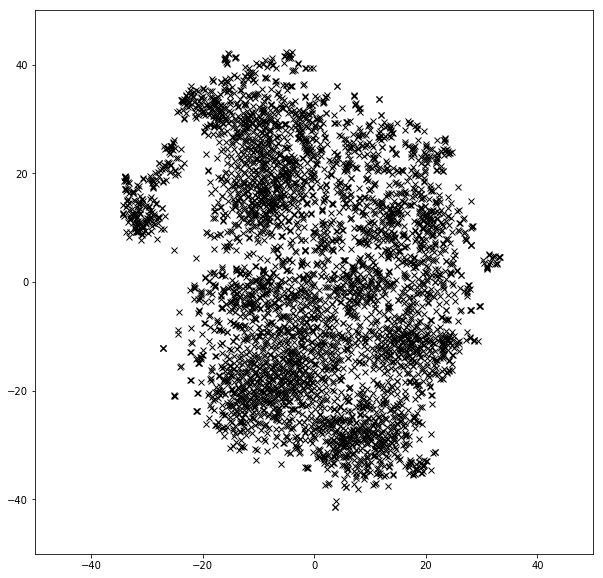

In [133]:
plt.figure(figsize=(10,10))
plt.plot(X[:,0],
         X[:,1],
         linestyle='None',
         color='k',
         marker='x')
plt.ylim(-50,50)
plt.xlim(-50,50)

Duration: 0s


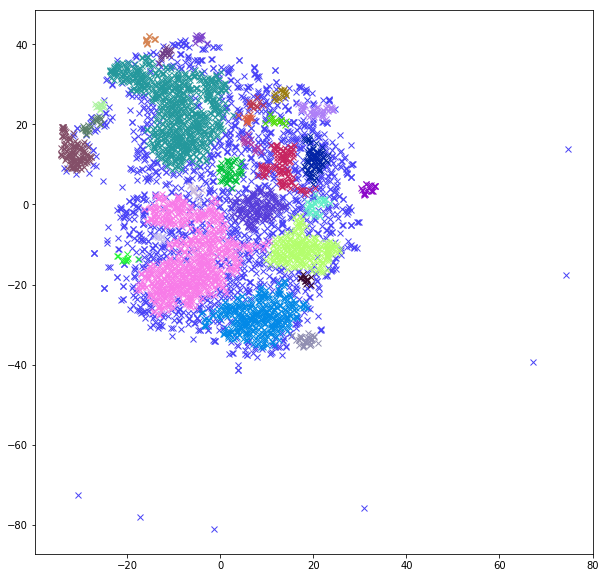

In [125]:
min_cluster_size=10
min_samples=10
cluster_selection_epsilon=1.5

t0 = time.time()
HDBSCAN = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                    min_samples=min_samples,
                                    cluster_selection_epsilon=cluster_selection_epsilon,
                                    cluster_selection_method='leaf').fit(X)
HDBSCAN.labels_ += 1
print('Duration: {:0.0f}s'.format(time.time()-t0))

clusters = {}
for i in range(max(HDBSCAN.labels_)+1):
    indicies = np.where(HDBSCAN.labels_ == i)[0]
    clusters[i] = X[indicies,:]

cluster_means = {}
for i in range(max(HDBSCAN.labels_)+1):
    np.mean(clusters[i],axis=0)
    cluster_means[i] = np.mean(clusters[i],axis=0)

plt.figure(figsize=(10,10))
ax = plt.subplot()
for i in clusters:
    plt.plot(clusters[i][:,0],clusters[i][:,1],linestyle='',marker='x',color=colors[i])
    #plt.scatter(cluster_means[i][0],cluster_means[i][1],color='white',s=300,zorder=1)
    #plt.text(cluster_means[i][0],cluster_means[i][1],str(i+1))
#i=7
#for i in range(12):
#plt.plot(clusters[i][:,0],clusters[i][:,1],linestyle='',marker='x',color='k')

In [175]:
#the following code takes a list such as
#[1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]
#with states labeled as successive integers starting with 0
#and returns a transition matrix, M,
#where M[i][j] is the probability of transitioning from i to j

def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

#test:

t = [1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]
m = transition_matrix(HDBSCAN.labels_)
#for row in m: print(' '.join('{0:.2f}'.format(x) for x in row))

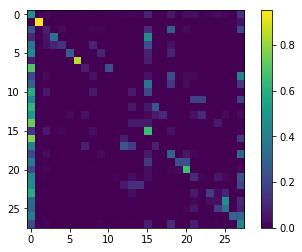

In [181]:
plt.imshow(m)
plt.colorbar()

In [ ]:
min_cluster_size=10
min_samples=10
cluster_selection_epsilon=1.5

t0 = time.time()
HDBSCAN = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                    min_samples=min_samples,
                                    cluster_selection_epsilon=cluster_selection_epsilon,
                                    cluster_selection_method='leaf').fit(X)
HDBSCAN.labels_ += 1
print('Duration: {:0.0f}s'.format(time.time()-t0))

clusters = {}
for i in range(max(HDBSCAN.labels_)+1):
    indicies = np.where(HDBSCAN.labels_ == i)[0]
    clusters[i] = X[indicies,:]

cluster_means = {}
for i in range(max(HDBSCAN.labels_)+1):
    np.mean(clusters[i],axis=0)
    cluster_means[i] = np.mean(clusters[i],axis=0)

(-50, 50)

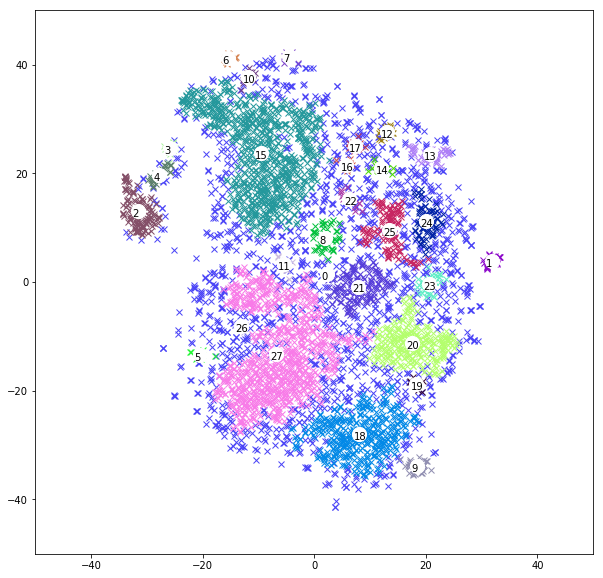

In [189]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
for i in clusters:
    ax.plot(clusters[i][:,0],clusters[i][:,1],linestyle='',marker='x',color=colors[i],zorder=0)
    ax.scatter(cluster_means[i][0],cluster_means[i][1],color='white',s=200,zorder=1)
    ax.text(cluster_means[i][0]-1,cluster_means[i][1]-1,str(i))
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)

In [188]:
cluster_means = {}
for i in range(max(clusters)+1):
    np.mean(clusters[i],axis=0)
    cluster_means[i] = np.mean(clusters[i],axis=0)

In [190]:
3

3

# Take over 3D tsne

In [191]:
t0 = time.time()
X = TSNE(n_components=3,perplexity=40).fit_transform(pca_loadings[:,:100])
print('Duration: {:0.0f}s'.format(time.time()-t0))

Duration: 32s


In [ ]:
plt.figure(figsize=(10,10))
plt.plot(X[:,0],
         X[:,1],
         linestyle='None',
         color='k',
         marker='x')
plt.ylim(-50,50)
plt.xlim(-50,50)

In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [9]:
%matplotlib notebook

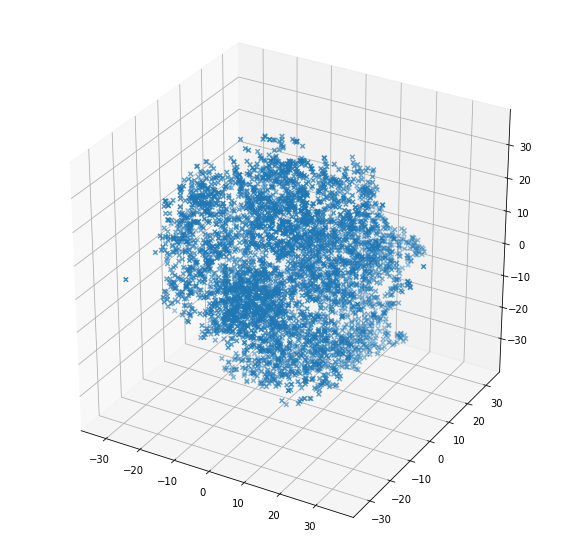

In [198]:
t0 = time.time()
X = TSNE(n_components=3,perplexity=40).fit_transform(pca_loadings[:,:100])
print('Duration: {:0.0f}s'.format(time.time()-t0))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2],marker='x')

Duration: 35s


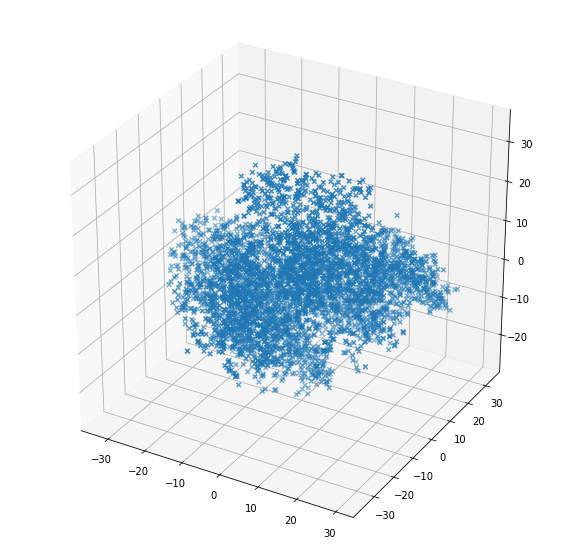

In [206]:
t0 = time.time()
X = TSNE(n_components=3,perplexity=60).fit_transform(pca_loadings[:,:50])
print('Duration: {:0.0f}s'.format(time.time()-t0))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2],marker='x')

Duration: 23s


<IPython.core.display.Javascript object>


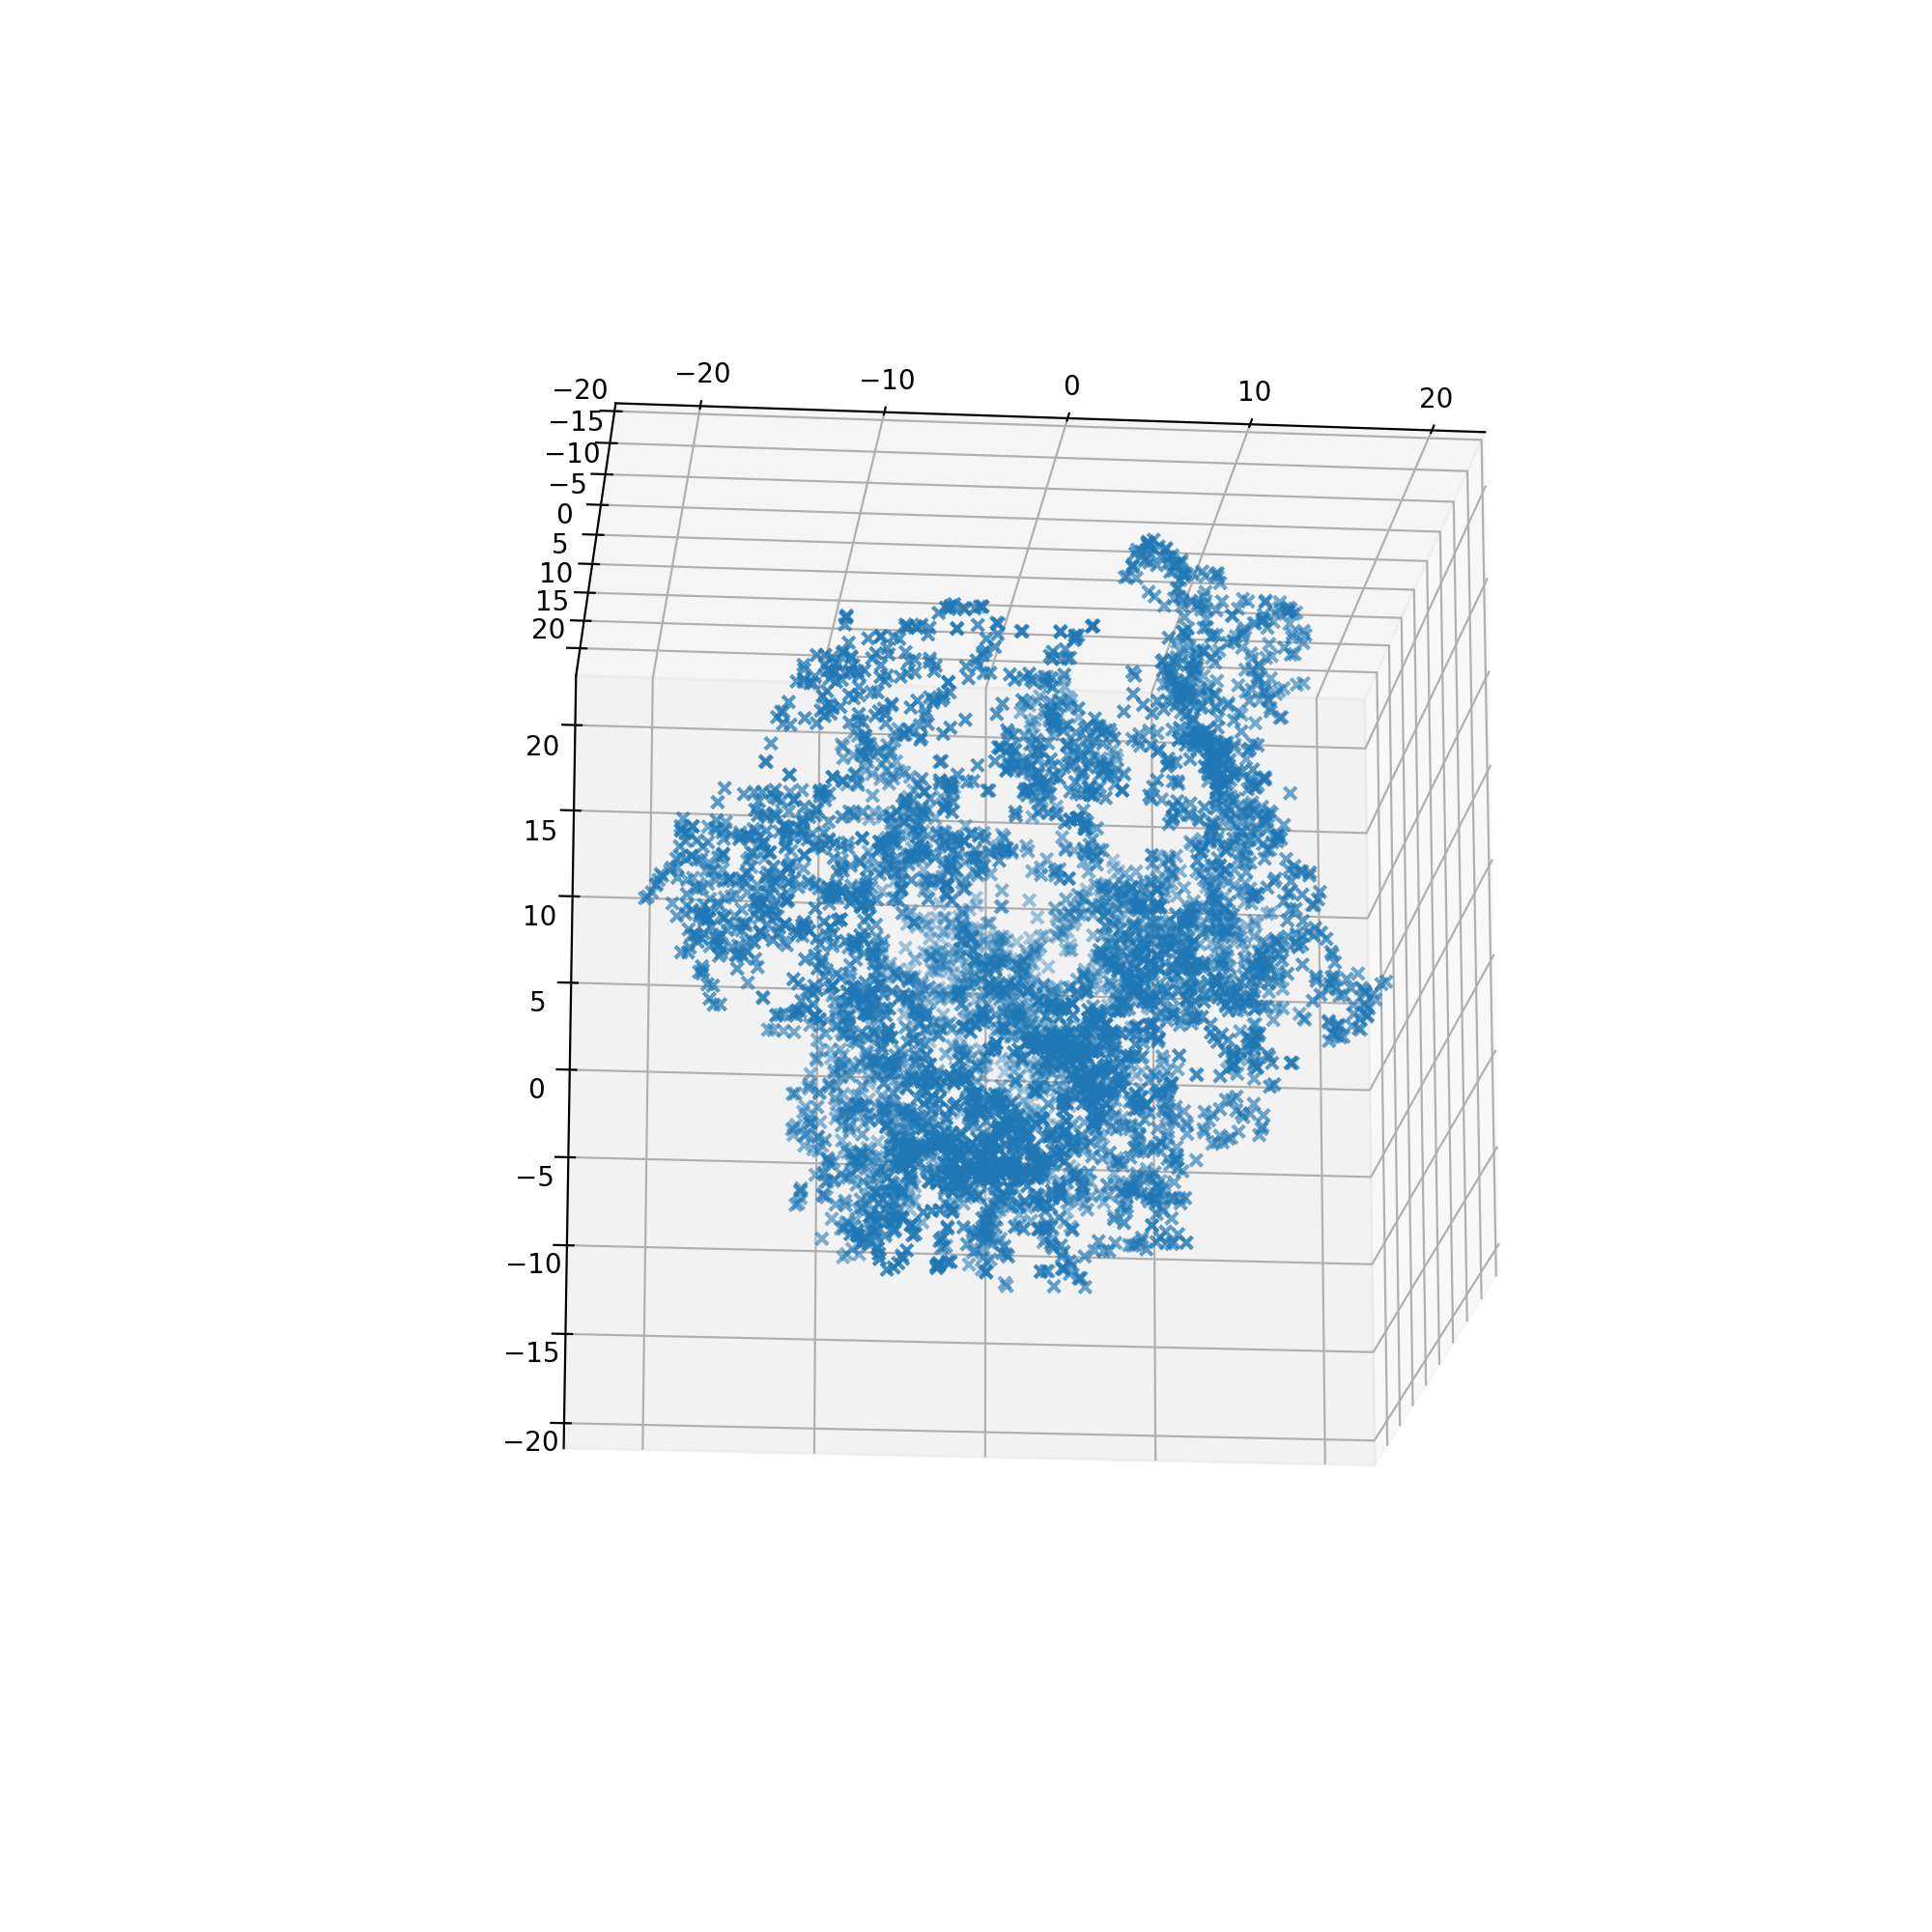

In [13]:
t0 = time.time()
X = TSNE(n_components=3,perplexity=30).fit_transform(pca_loadings[:,:10])
print('Duration: {:0.0f}s'.format(time.time()-t0))
# 20 was good
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2],marker='x')

<IPython.core.display.Javascript object>


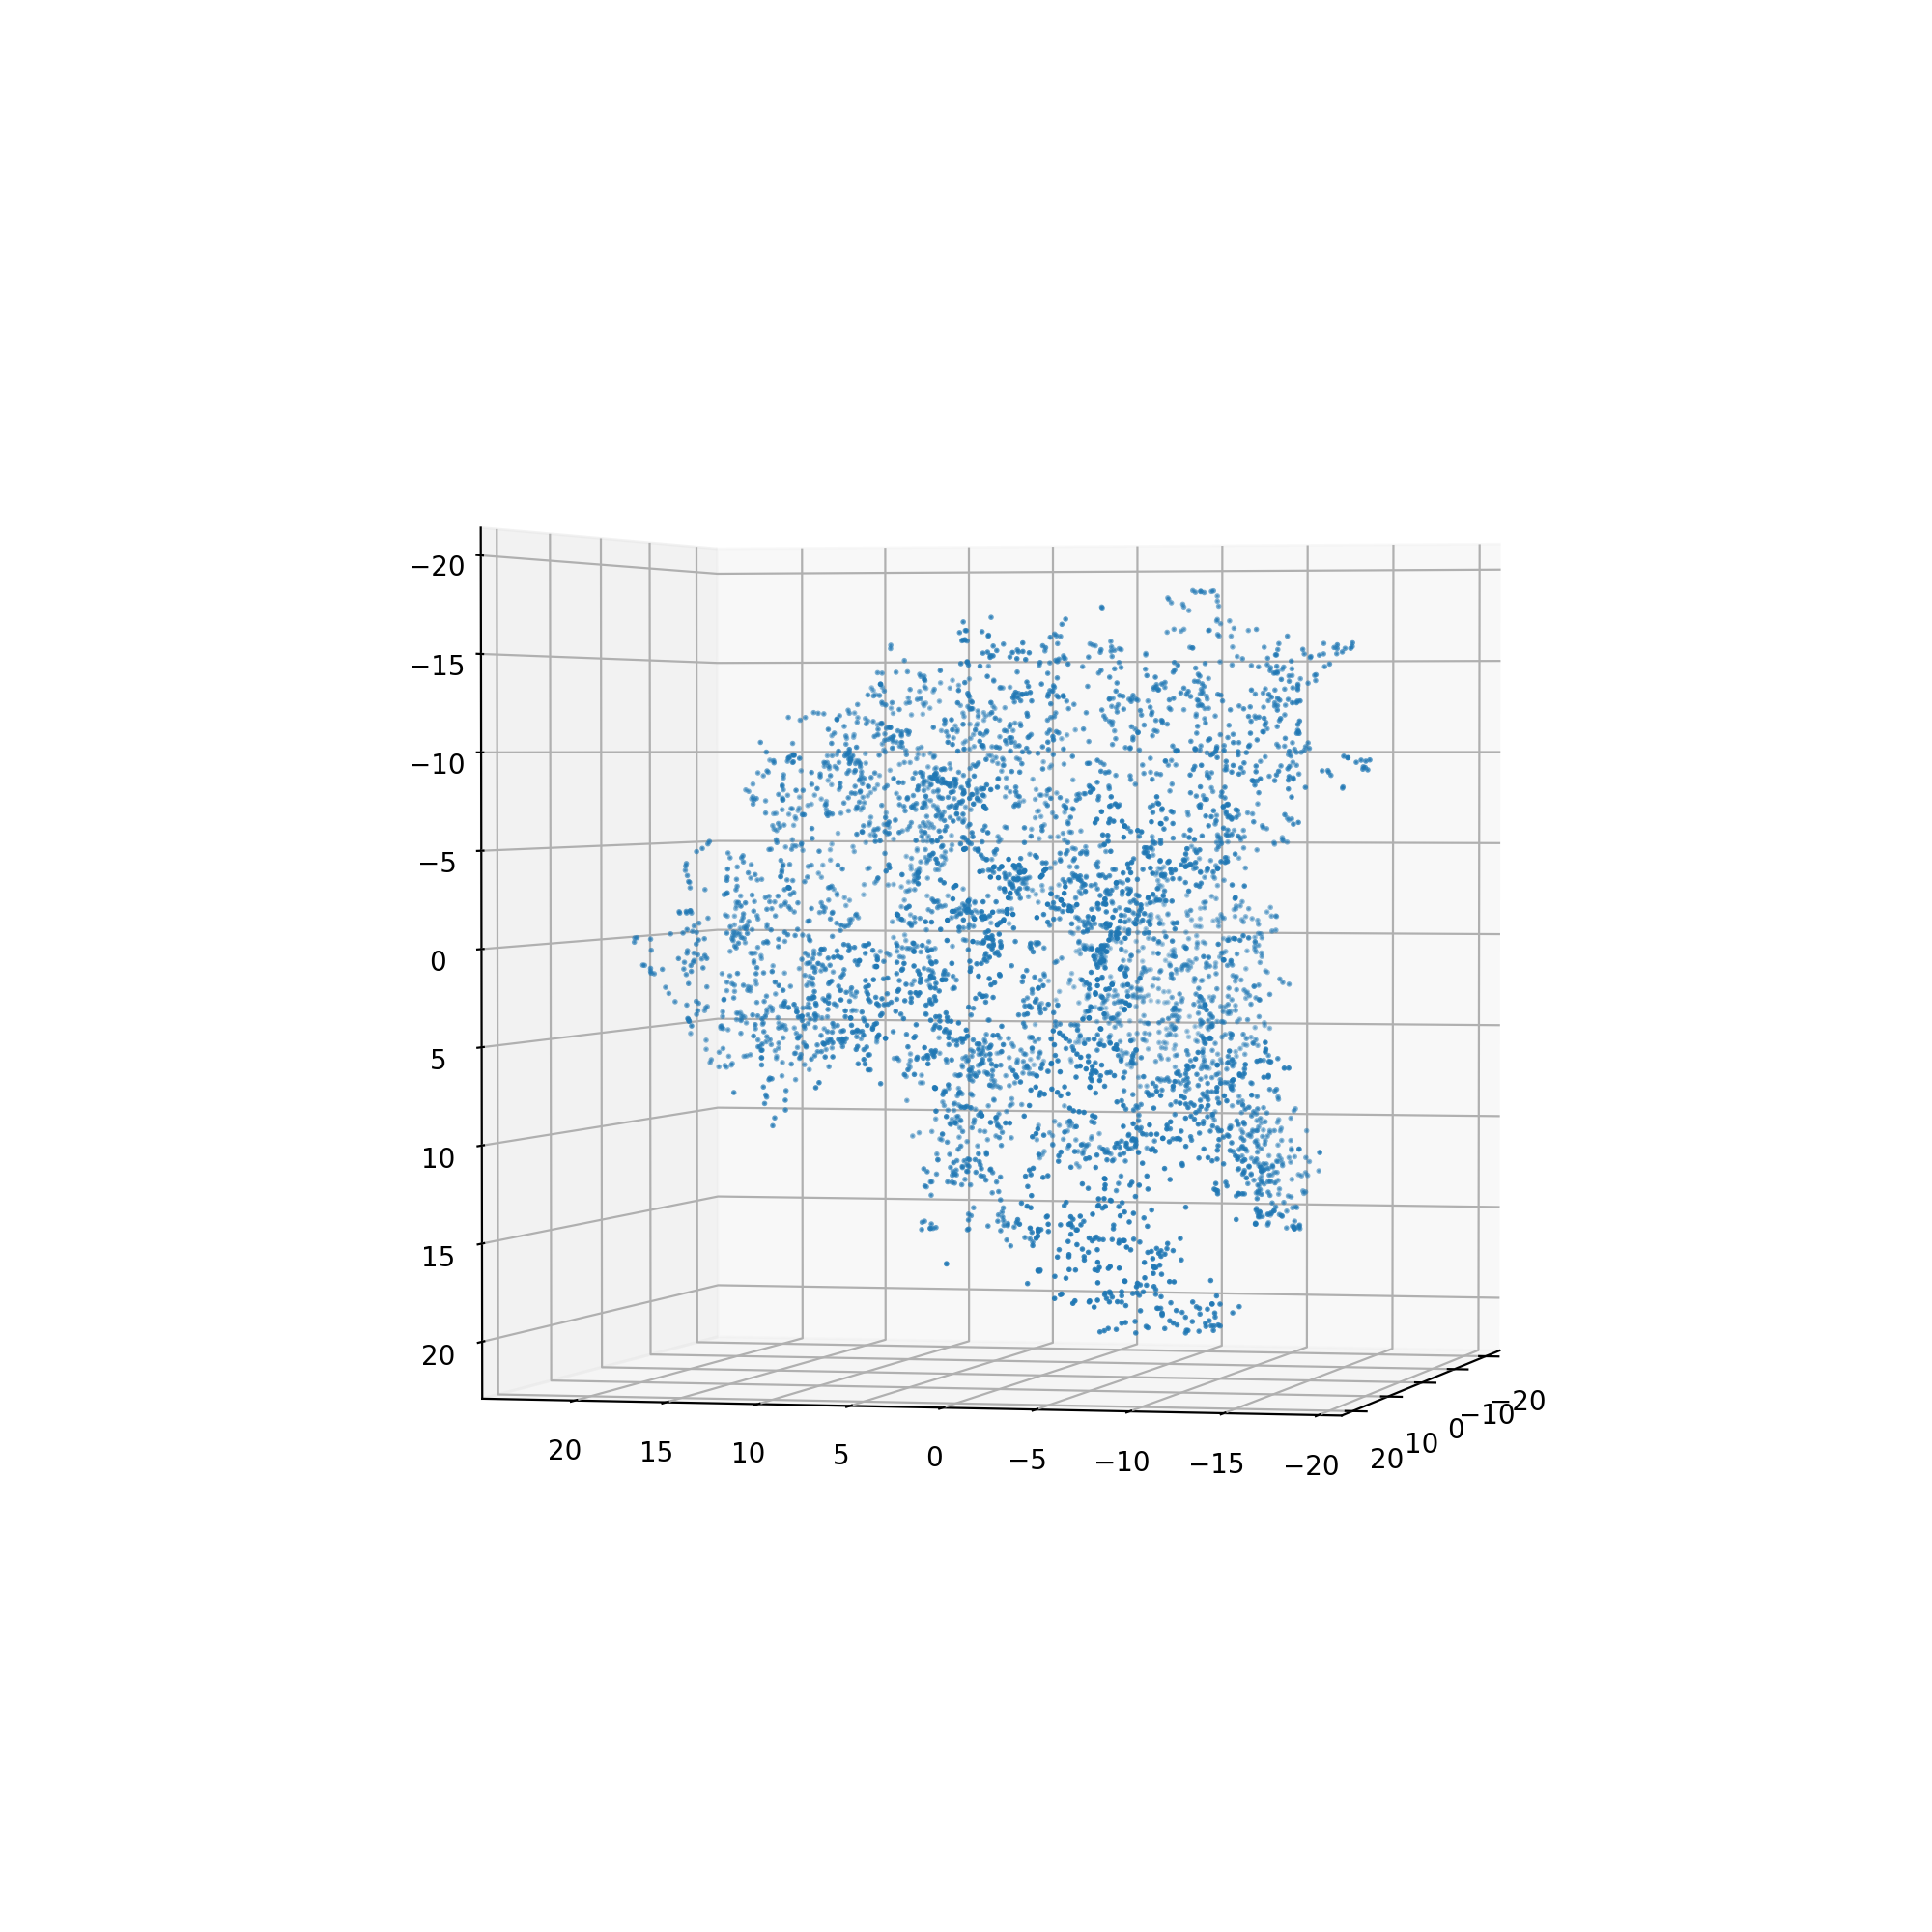

In [36]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2],marker='o',s=1)

In [ ]:
for i in range(X.shape[0]-1):
    X[i:i+2,0],X[i:i+2,1],X[i:i+2,2],

In [48]:
i = 100
X[i:i+2,0],X[i:i+2,1],X[i:i+2,2]

(array([10.116125,  7.535855], dtype=float32),
 array([ 2.3830616, -7.1640553], dtype=float32),
 array([-8.380849 , -1.8014021], dtype=float32))

In [84]:
lines4cluster = []
for i in range(X.shape[0]-1):
    lines4cluster.append(tuple(X[i:i+2,0]) + tuple(X[i:i+2,1]) + tuple(X[i:i+2,2]))

In [86]:
np.shape(lines4cluster)

(4553, 6)

In [85]:
lines4cluster = np.asarray(lines4cluster)

In [83]:
lines4cluster[-1]

-0.65483934

In [88]:
import hdbscan

In [89]:
min_cluster_size=10
min_samples=10
cluster_selection_epsilon=1.8

t0 = time.time()
lines_clustered = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                    min_samples=min_samples,
                                    cluster_selection_epsilon=cluster_selection_epsilon,
                                    cluster_selection_method='leaf').fit(lines4cluster)
lines_clustered.labels_ += 1
print('Duration: {:0.0f}s'.format(time.time()-t0))

Duration: 0s


In [96]:
max(lines_clustered.labels_)

43

In [10]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
          '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
          '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',
          '#000000']

In [196]:
from random import randint
colors = []

for i in range(100):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [ ]:
#good:
min_cluster_size=15
min_samples=5
cluster_selection_epsilon=1

In [ ]:
Duration: 0s
score: 261.73736952094725
num clusters: 33
53% timepoints in a cluster.

In [206]:
save_file = os.path.join(directory, 'tsne', '20191221_X_labels.npy')
np.save(save_file,lines_clustered.labels_)

Duration: 0s
score: 261.73736952094725
num clusters: 33
53% timepoints in a cluster.


<IPython.core.display.Javascript object>


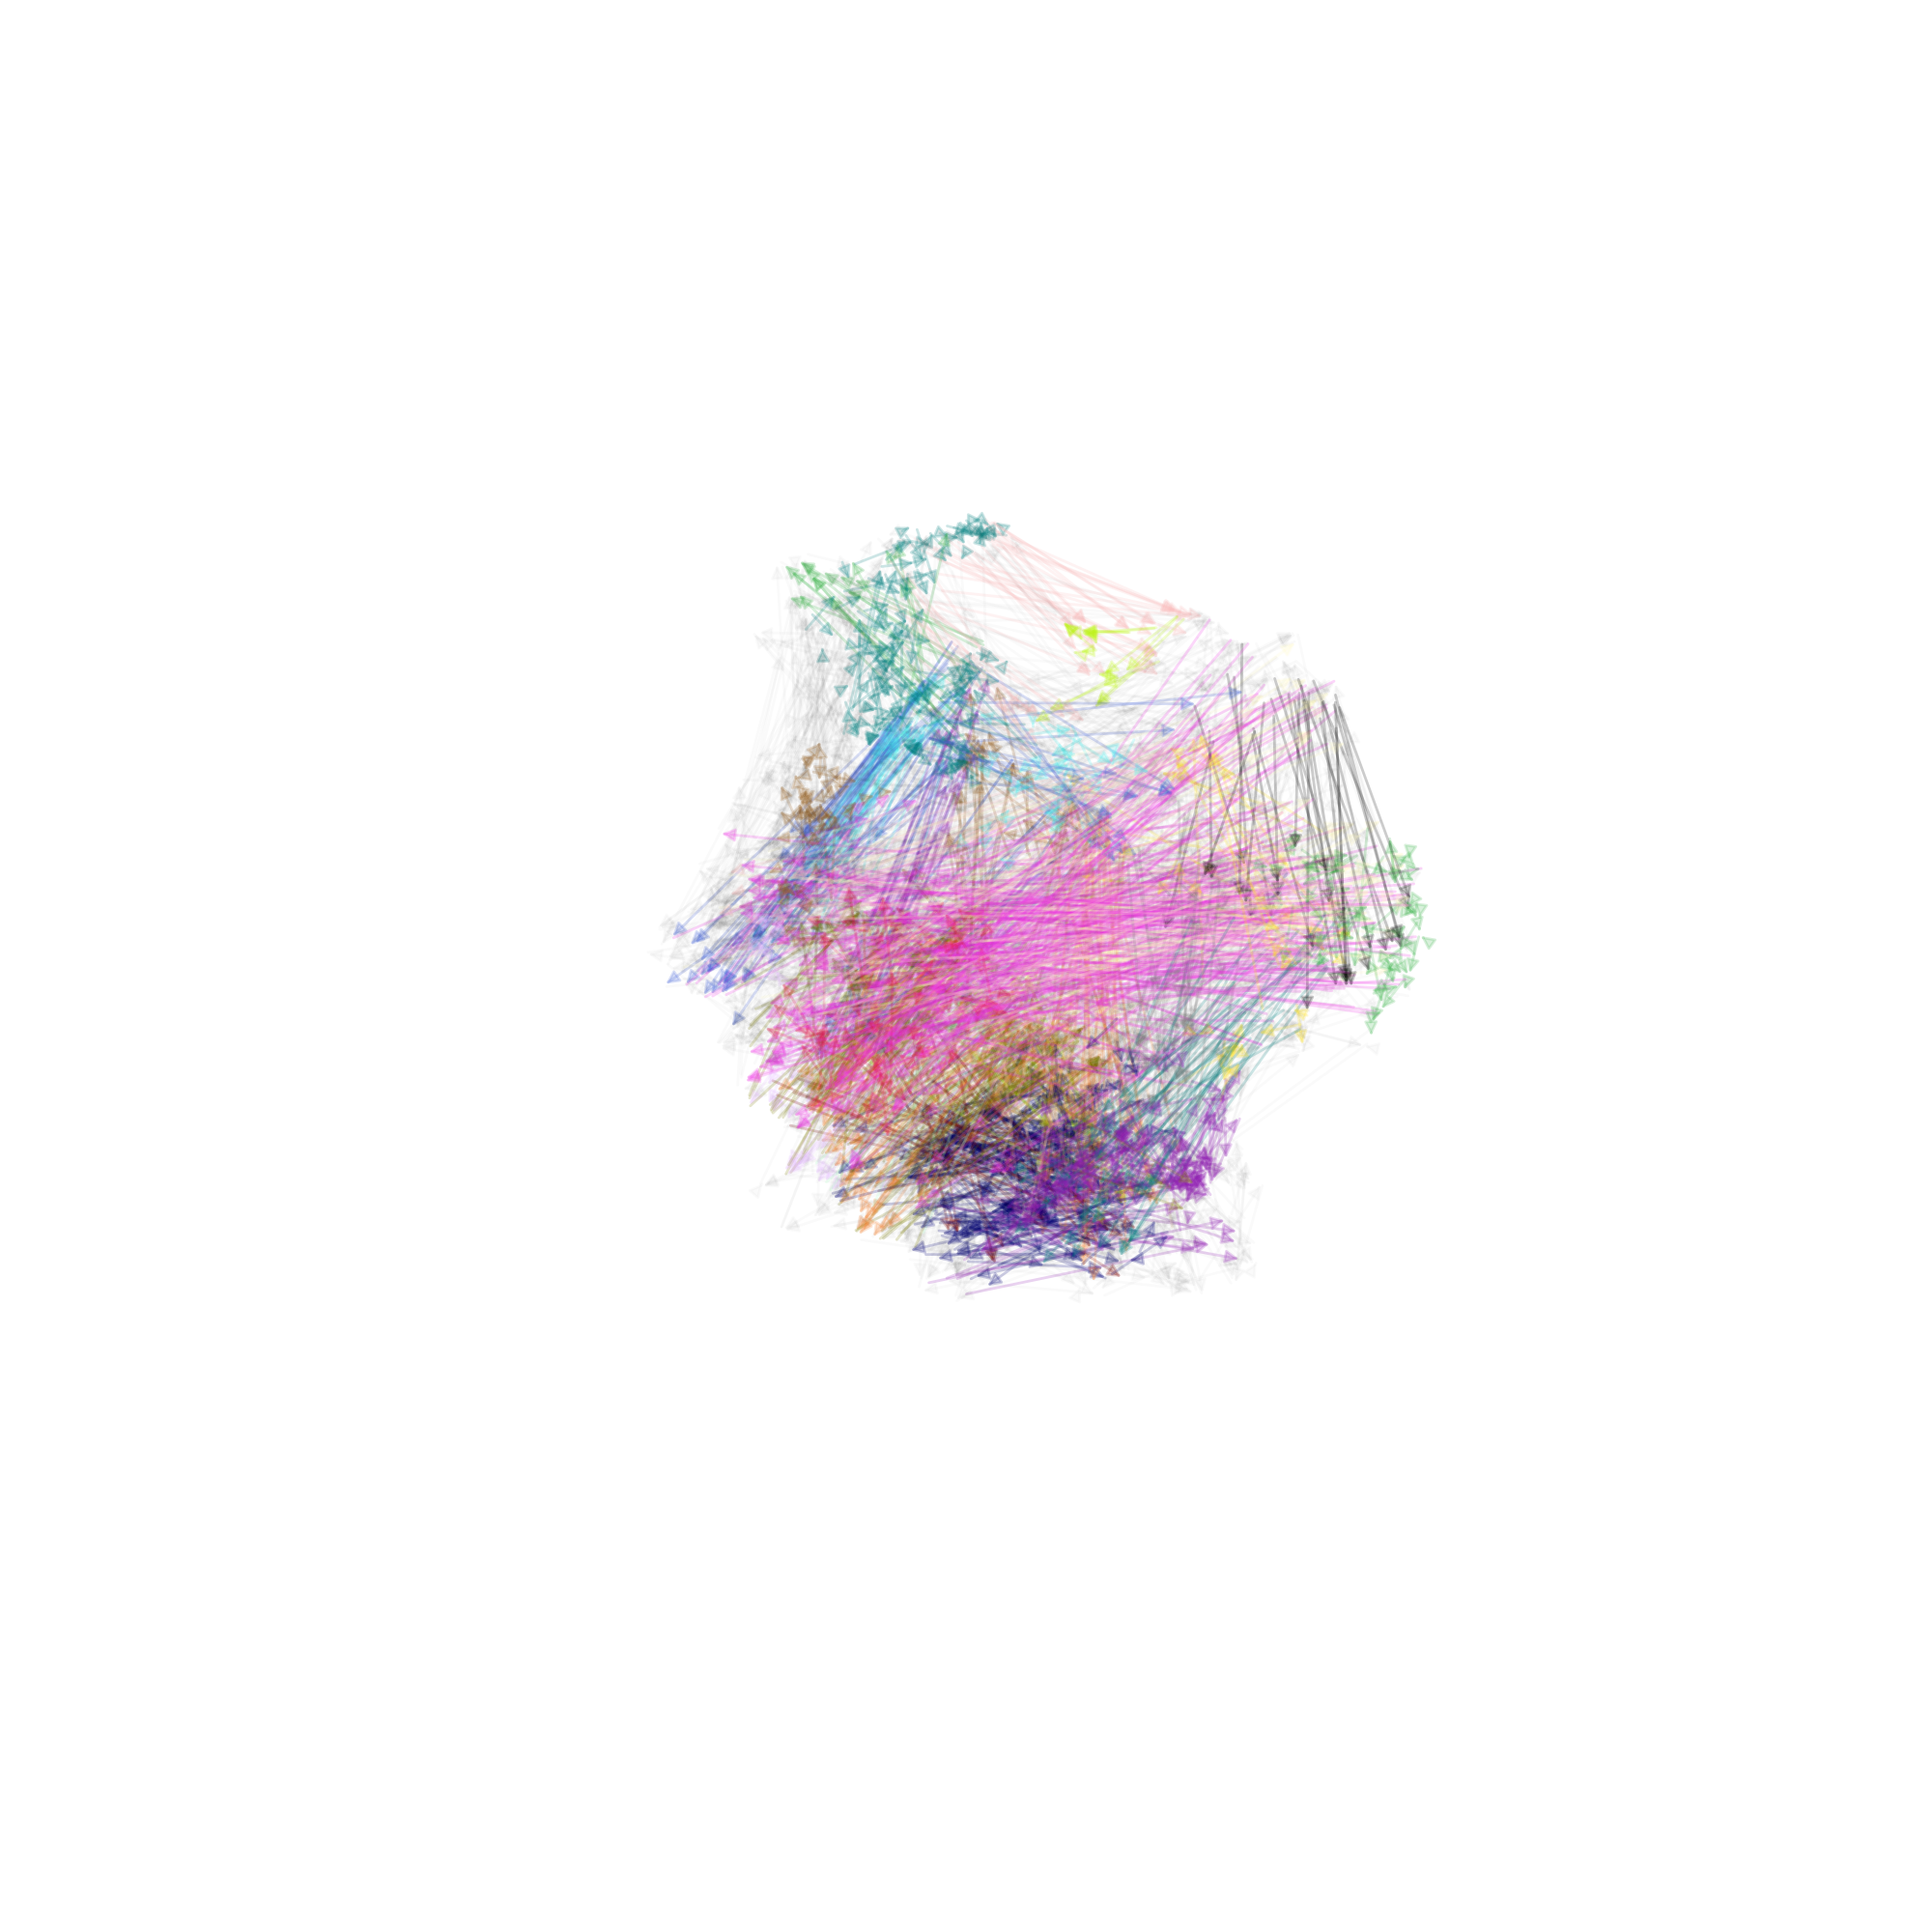

(-20.0, 20.0, -20.0, 20.0)

In [213]:
min_cluster_size = 15 # i think a cluster needs this # of samples?
min_samples=5 # decrease to cause more "noise" to be added to the dense clusters
cluster_selection_epsilon=1 # anything smaller than this will be merged with neighbor

t0 = time.time()
lines_clustered = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                    min_samples=min_samples,
                                    cluster_selection_epsilon=cluster_selection_epsilon,
                                    cluster_selection_method='eom').fit(lines4cluster)
lines_clustered.labels_ += 1
cmap = get_cmap(max(lines_clustered.labels_))
print('Duration: {:0.0f}s'.format(time.time()-t0))

print('score: {}'.format(np.sum(lines_clustered.outlier_scores_)))
print('num clusters: {}'.format(max(lines_clustered.labels_)))
num_zeros = len(np.where(lines_clustered.labels_ == 0)[0])
num_points = len(lines_clustered.labels_)
print('{:0.0f}% timepoints in a cluster.'.format(num_zeros/num_points*100))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X[:,0], X[:,1], X[:,2],marker='o',s=1,zorder=1,color='k',alpha=0.25)
for i in range(X.shape[0]-1):
    if lines_clustered.labels_[i] == 0:
        alpha = 0.02
        color='#000000'
    else:
        alpha = 0.2
        color=colors[lines_clustered.labels_[i]%len(colors)]
    a = Arrow3D(X[i:i+2,0],X[i:i+2,1],X[i:i+2,2],
                mutation_scale=10,lw=1,arrowstyle="-|>",
                color=color,alpha=alpha)
    ax.add_artist(a)
    #ax.plot(X[i:i+2,0],
    #        X[i:i+2,1],
    #        X[i:i+2,2],
    #         alpha=alpha,
    #         lw=1,
    #         #solid_capstyle='butt',
    #         c=colors[lines_clustered.labels_[i]%len(colors)],
    #         zorder=0)
ax.set_ylim(-20,20)
ax.set_xlim(-20,20)
ax.set_zlim(-20,20)
ax.view_init(30,0)
plt.axis('off')

In [215]:
save_path = os.path.join(directory,'tsne','videos')
os.mkdir(save_path)

In [13]:
%matplotlib inline

In [ ]:
class lines_clustered:
    

In [8]:
file = os.path.join(directory, 'tsne', '20191221_X_labels.npy')
labels = np.load(file)
file = os.path.join(directory, 'tsne', '20191221_X.npy')
X = np.load(file)

In [ ]:
save_path = os.path.join(directory,'tsne','videos','20191221_0')
#os.mkdir(save_path)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X[:,0], X[:,1], X[:,2],marker='o',s=1,zorder=1,color='k',alpha=0.25)
for i in range(X.shape[0]-1):
    if labels[i] == 0:
        alpha = 0
        color='#000000'
    else:
        alpha = 1
        color=colors[labels[i]%len(colors)]
    a = Arrow3D(X[i:i+2,0],X[i:i+2,1],X[i:i+2,2],
                mutation_scale=6,lw=0.25,arrowstyle="-|>",
                color=color,alpha=alpha)
    ax.add_artist(a)
    #ax.plot(X[i:i+2,0],
    #        X[i:i+2,1],
    #        X[i:i+2,2],
    #         alpha=alpha,
    #         lw=1,
    #         #solid_capstyle='butt',
    #         c=colors[lines_clustered.labels_[i]%len(colors)],
    #         zorder=0)
ax.set_ylim(-20,20)
ax.set_xlim(-20,20)
ax.set_zlim(-20,20)
ax.margins(x=0, y=0)
#ax.set_proj_type('ortho')
plt.axis('off')
ax.view_init(15,angle)

for k,angle in enumerate(range(360)):
    print(angle)
    ax.view_init(0,angle)
    fname = os.path.join(save_path, '{0:05d}.png'.format(k))
    plt.savefig(fname,dpi=300,bbox_inches='tight')

0


In [18]:
np.min(X)

-21.563877

In [12]:
plt.show()

In [3]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [143]:
dir(lines_clustered)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_condensed_tree',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_metric_kwargs',
 '_min_spanning_tree',
 '_more_tags',
 '_outlier_scores',
 '_prediction_data',
 '_raw_data',
 '_relative_validity',
 '_single_linkage_tree',
 'algorithm',
 'allow_single_cluster',
 'alpha',
 'approx_min_span_tree',
 'cluster_persistence_',
 'cluster_selection_epsilon',
 'cluster_selection_method',
 'condensed_tree_',
 'core_dist_n_jobs',
 'exemplars_',
 'fit',
 'fit_predict',
 'gen_min_span_tree',
 'generate_prediction_data',
 'get_params',
 'labels_',
 'leaf_size',
 'match_reference_implementatio

In [173]:
np.sum(lines_clustered.outlier_scores_)

261.73736952094725

In [170]:
lines_clustered.relative_validity_

0.15411126917082119

In [157]:
ax = hdbscan.plots.MinimumSpanningTree.plot(lines_clustered.minimum_spanning_tree_)

In [159]:
ax

<IPython.core.display.Javascript object>


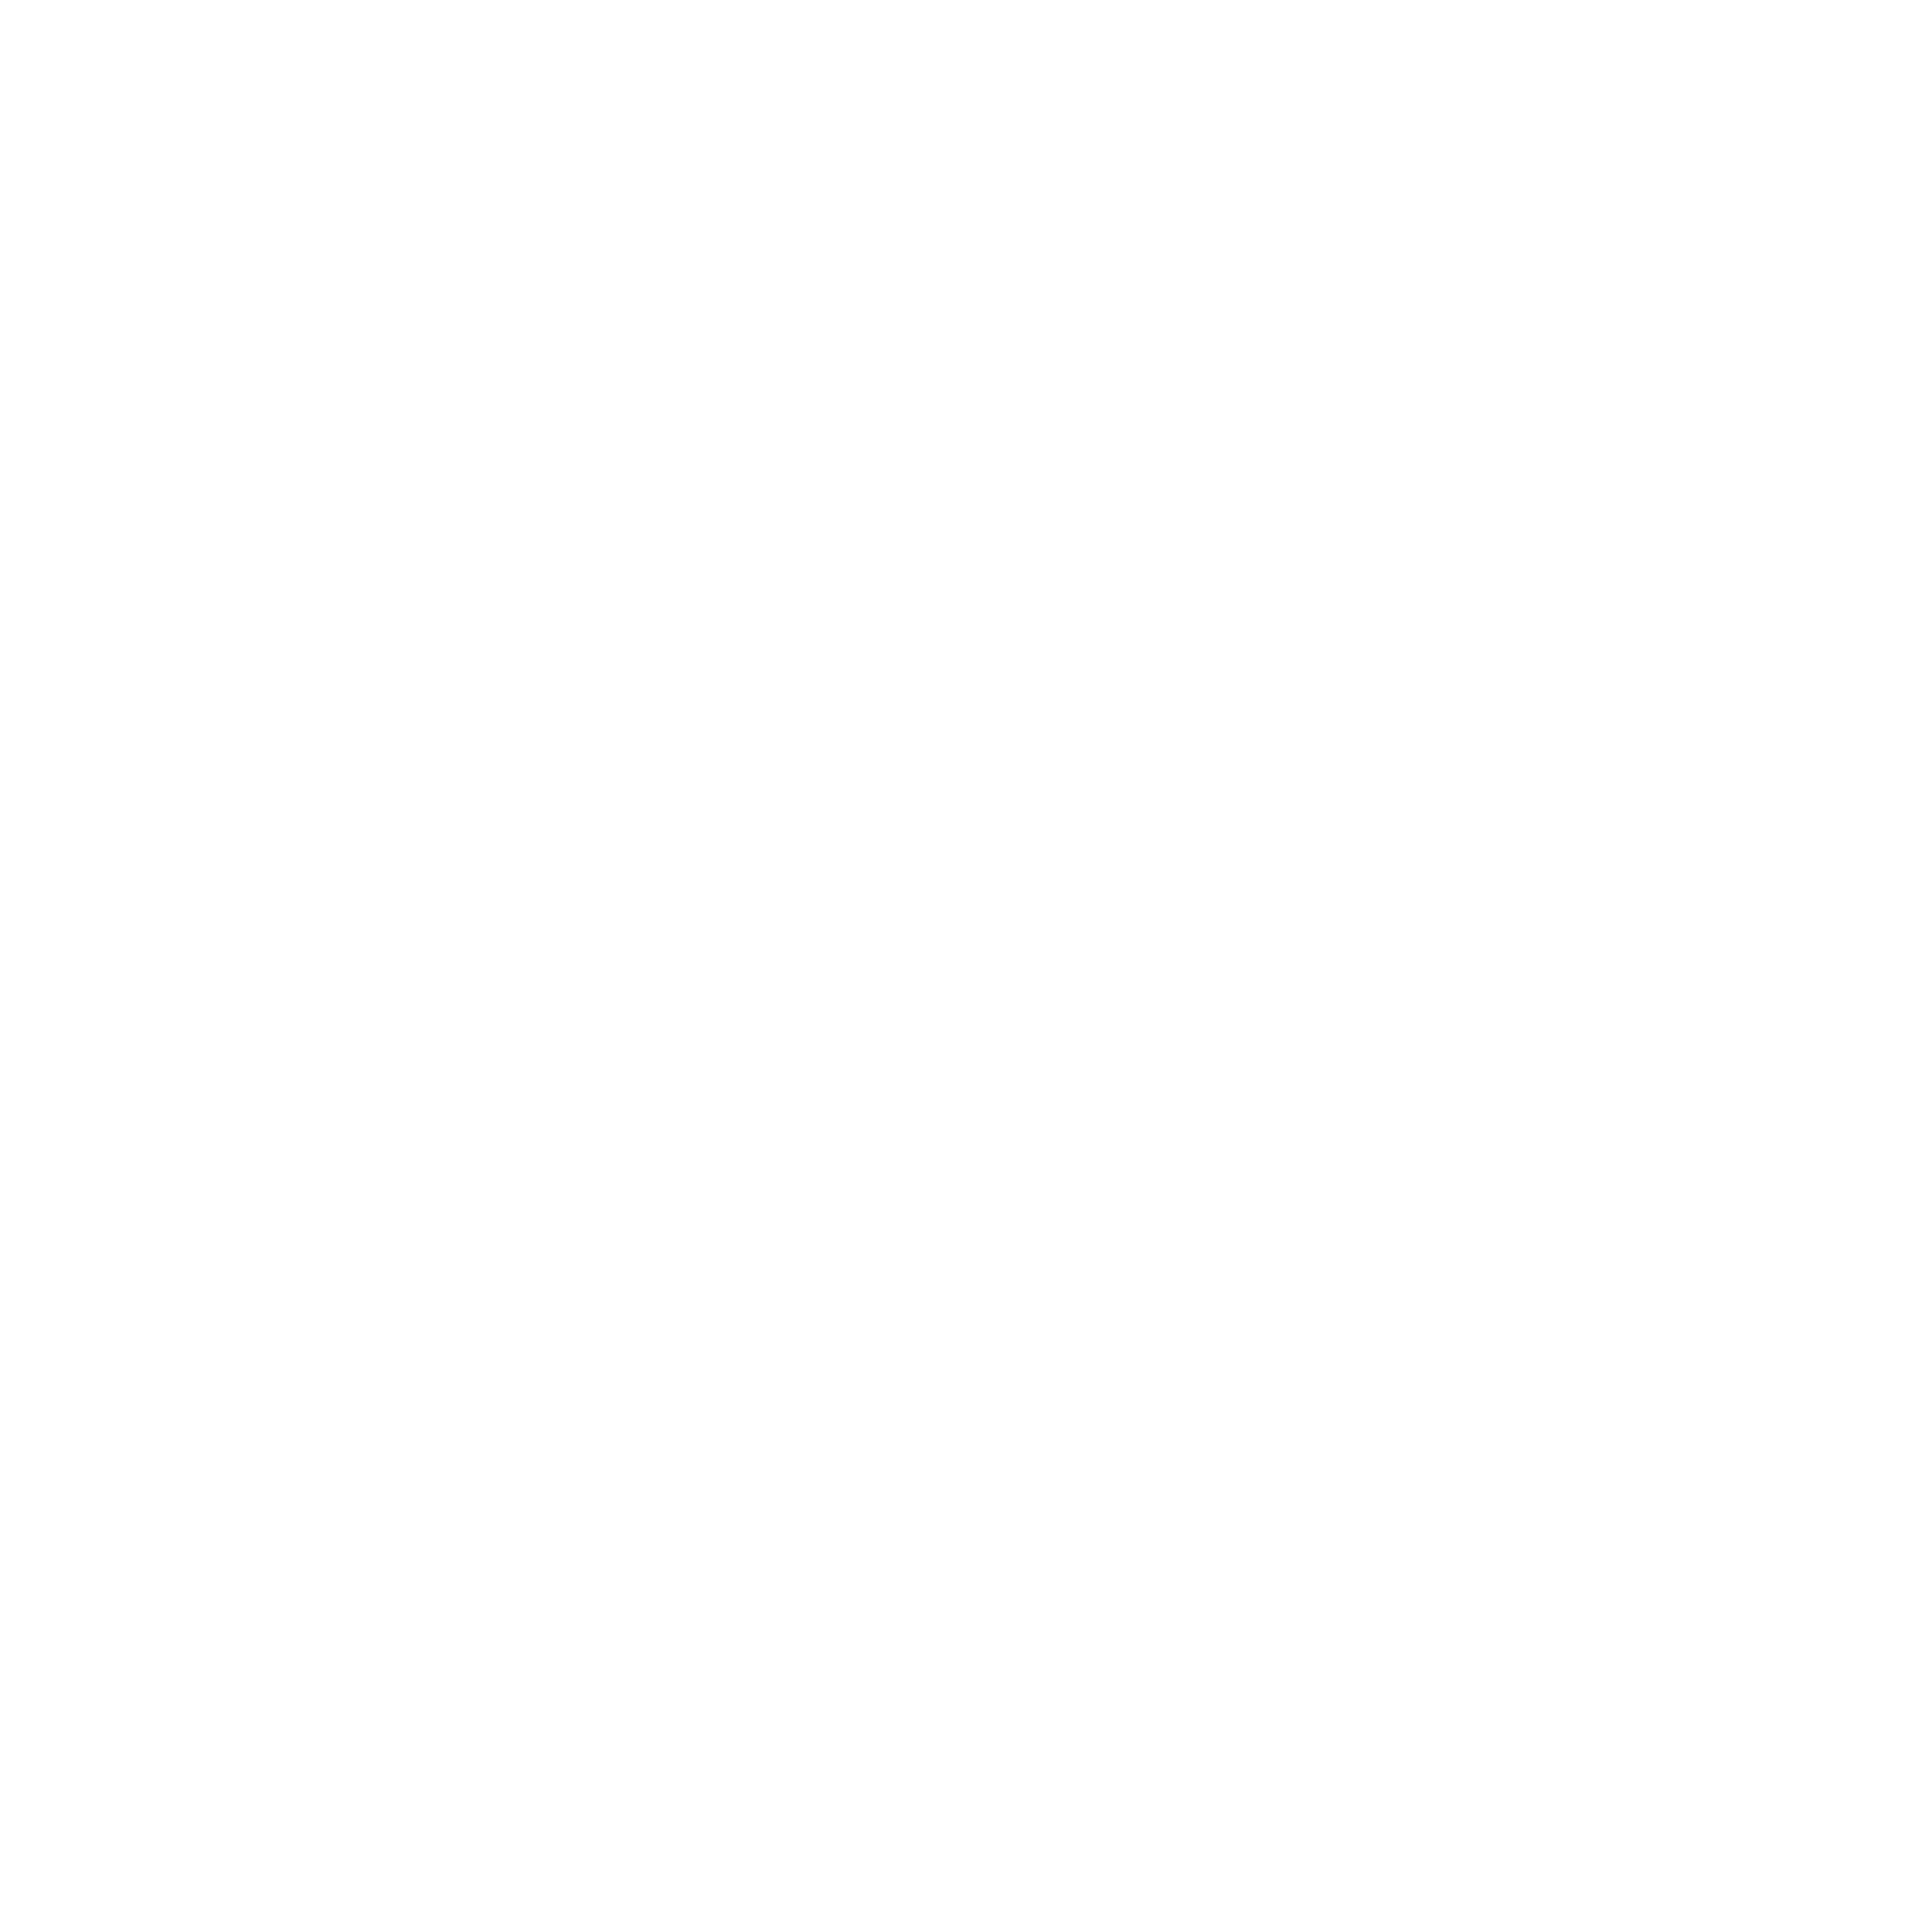

In [160]:
fig=plt.figure(figsize=(10,10))
fig.axes.append(ax)

In [155]:
dir(hdbscan.plots.MinimumSpanningTree.plot())

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'plot',
 'to_networkx',
 'to_numpy',
 'to_pandas']

In [169]:
lines_clustered = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                    min_samples=min_samples,
                                    cluster_selection_epsilon=cluster_selection_epsilon,
                                    cluster_selection_method='eom',
                                 gen_min_span_tree=True).fit(lines4cluster)

In [145]:
from sklearn.datasets import make_blobs

data, _ = make_blobs(1000)

clusterer = hdbscan.RobustSingleLinkage(cut=0.125, k=7)
cluster_labels = clusterer.fit_predict(data)
hierarchy = clusterer.cluster_hierarchy_
alt_labels = hierarchy.get_clusters(0.100, 5)
hierarchy.plot()
plt.show()

<IPython.core.display.Javascript object>


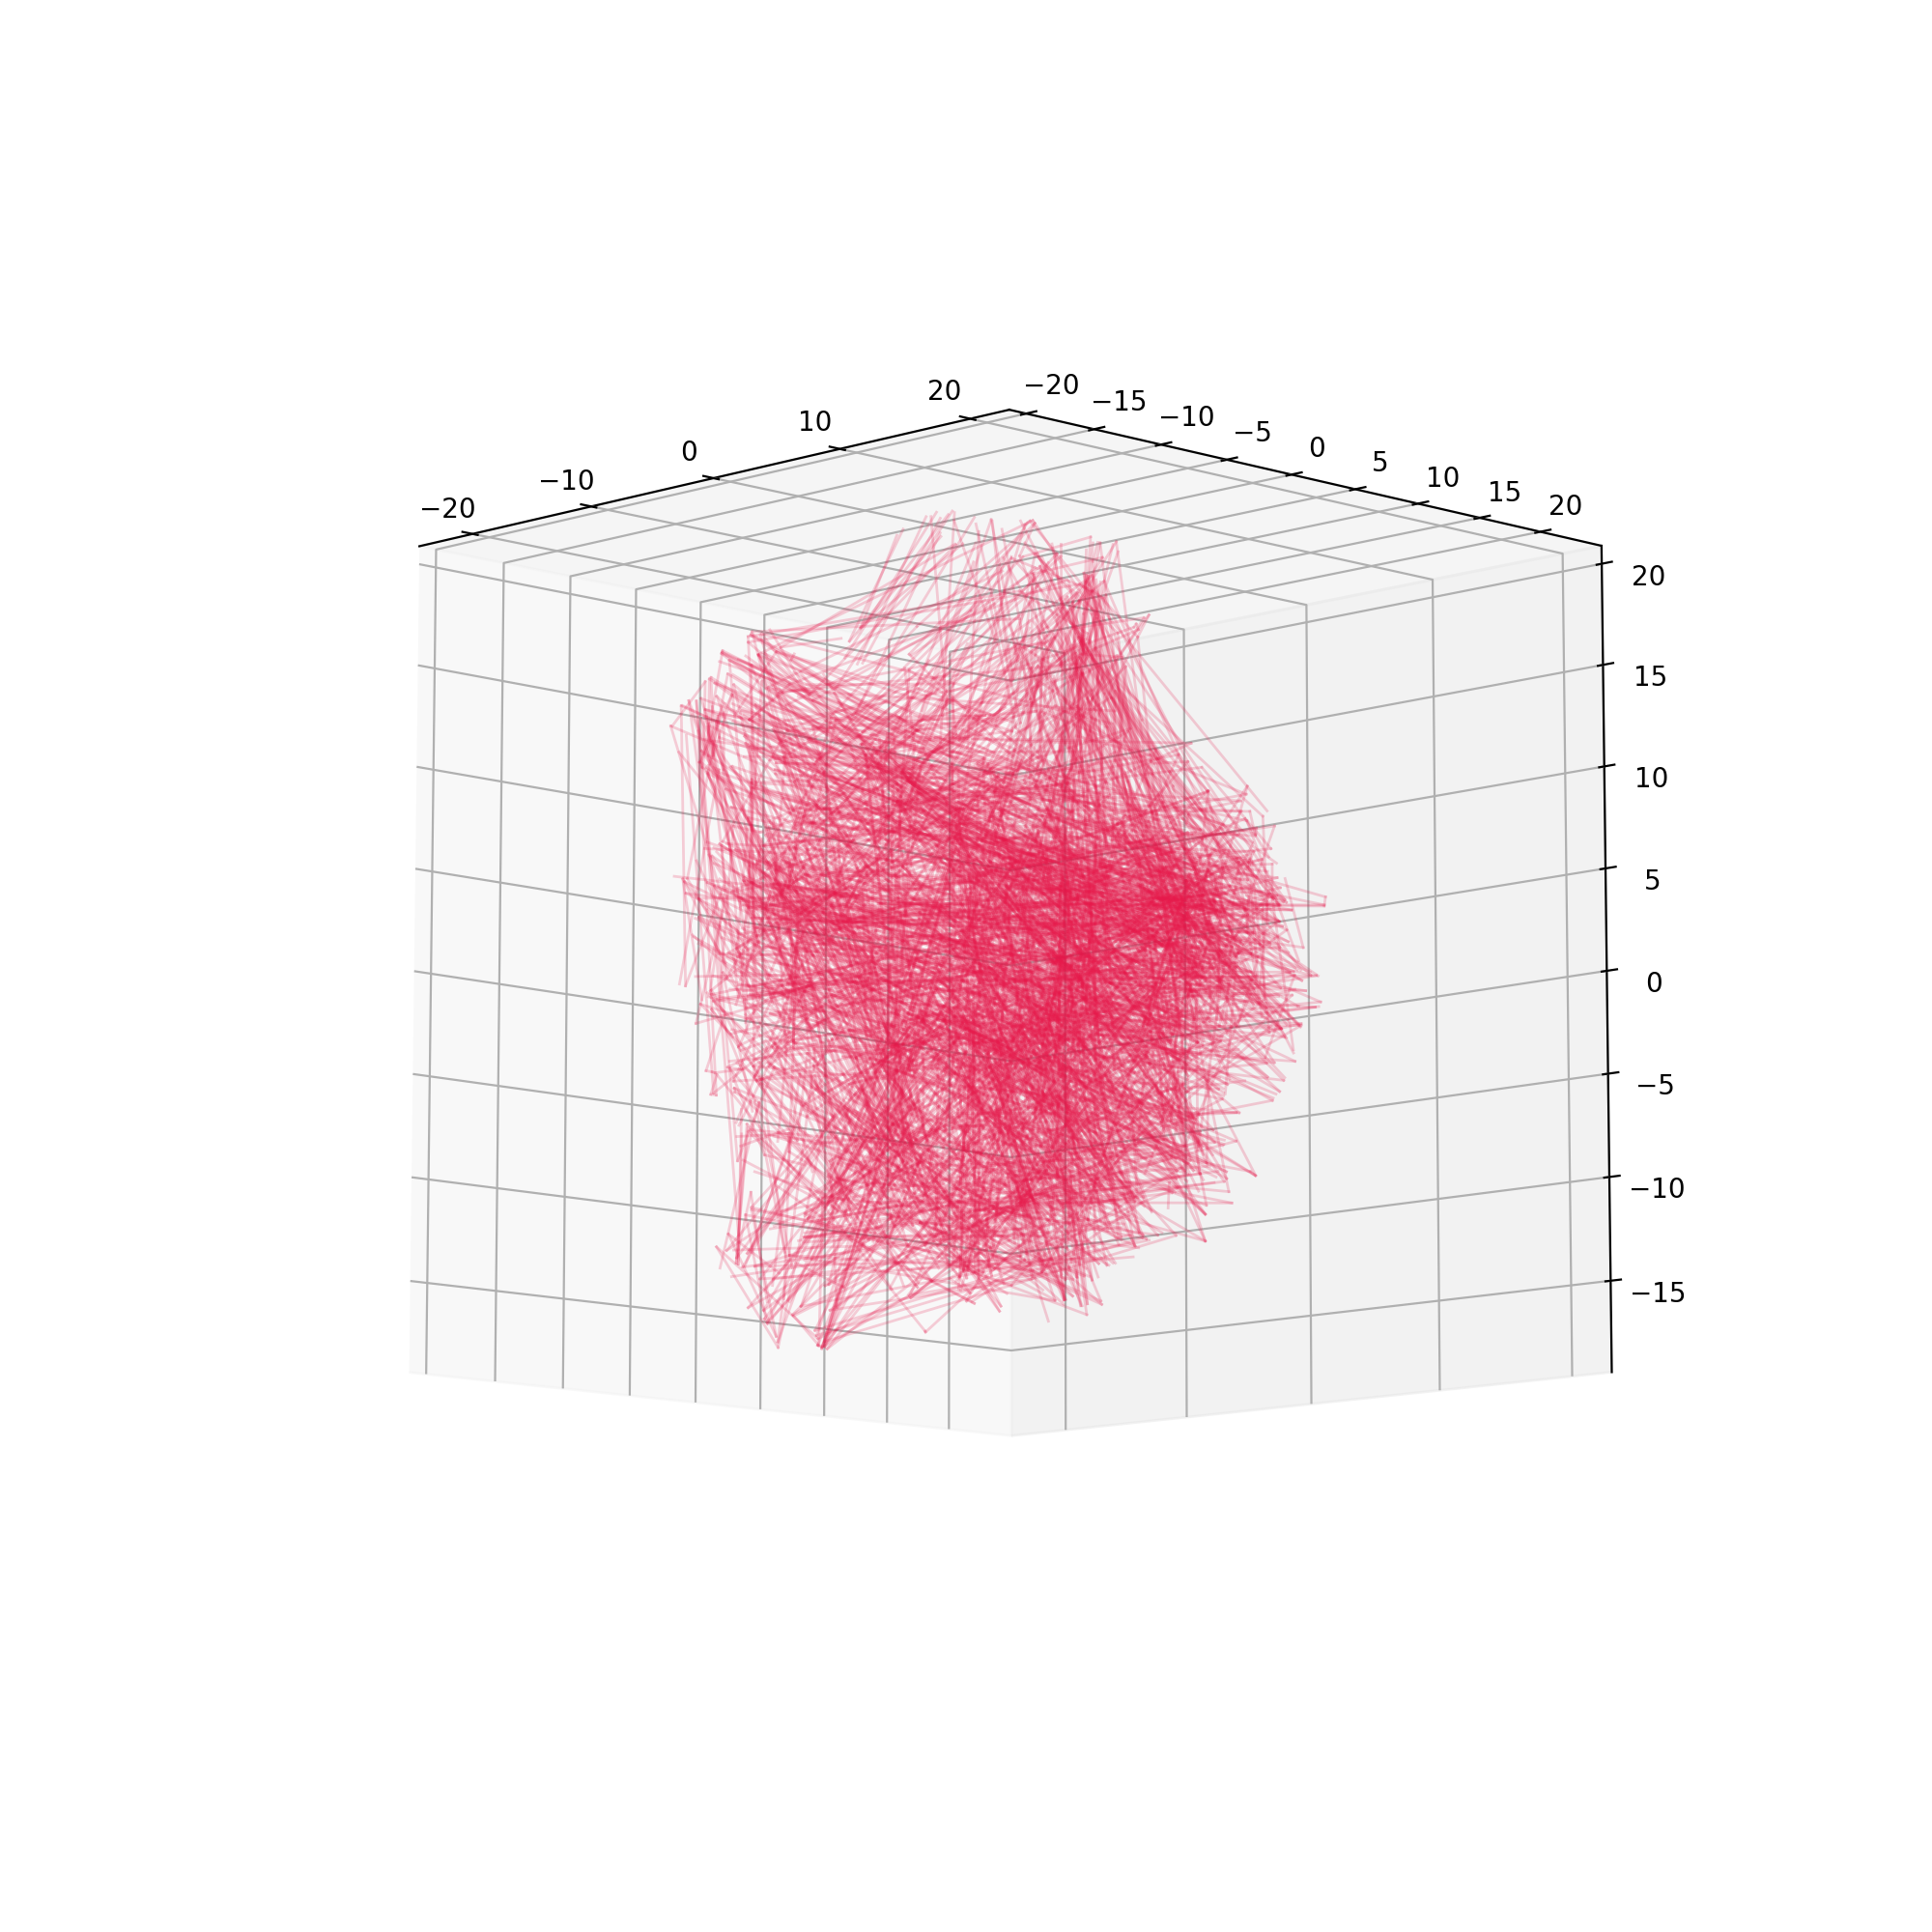

33
53% timepoints in a cluster.


In [189]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X[:,0], X[:,1], X[:,2],marker='o',s=5,zorder=1)
for i in range(X.shape[0]-1):
    if lines_clustered.labels_[i] == 0:
        alpha = 0.2
    else:
        alpha = 0
    ax.plot(X[i:i+2,0],
            X[i:i+2,1],
            X[i:i+2,2],
             alpha=alpha,
             lw=1,
             #solid_capstyle='butt',
             c=colors[lines_clustered.labels_[i]%len(colors)],
             zorder=0)
#ax.set_ylim()
print(max(lines_clustered.labels_))

num_zeros = len(np.where(lines_clustered.labels_ == 0)[0])
num_points = len(lines_clustered.labels_)

print('{:0.0f}% timepoints in a cluster.'.format(num_zeros/num_points*100))

In [116]:
len(np.where(lines_clustered.labels_==1)[0])

25

In [105]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [106]:
cmap = get_cmap(max(lines_clustered.labels_))

In [107]:
cmap

In [120]:
lines_clustered.labels_[:100]

array([ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0, 21, 25, 25,  0,  0,
        0, 25,  0,  0,  0, 14, 14, 14,  0,  0, 25, 21, 25, 25, 25, 21,  0,
       25, 25, 21,  0,  0, 21, 25, 25, 25, 21, 25, 25, 25,  0, 14, 14, 14,
       14, 14, 14, 14, 14, 14,  0,  0, 21, 25, 25, 25, 21, 25,  0, 21, 25,
       25, 25, 21, 25, 25, 21, 25, 25, 25,  0, 21,  2, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14,  0,  0, 25, 21, 25, 25, 21, 25, 25, 25])

<IPython.core.display.Javascript object>


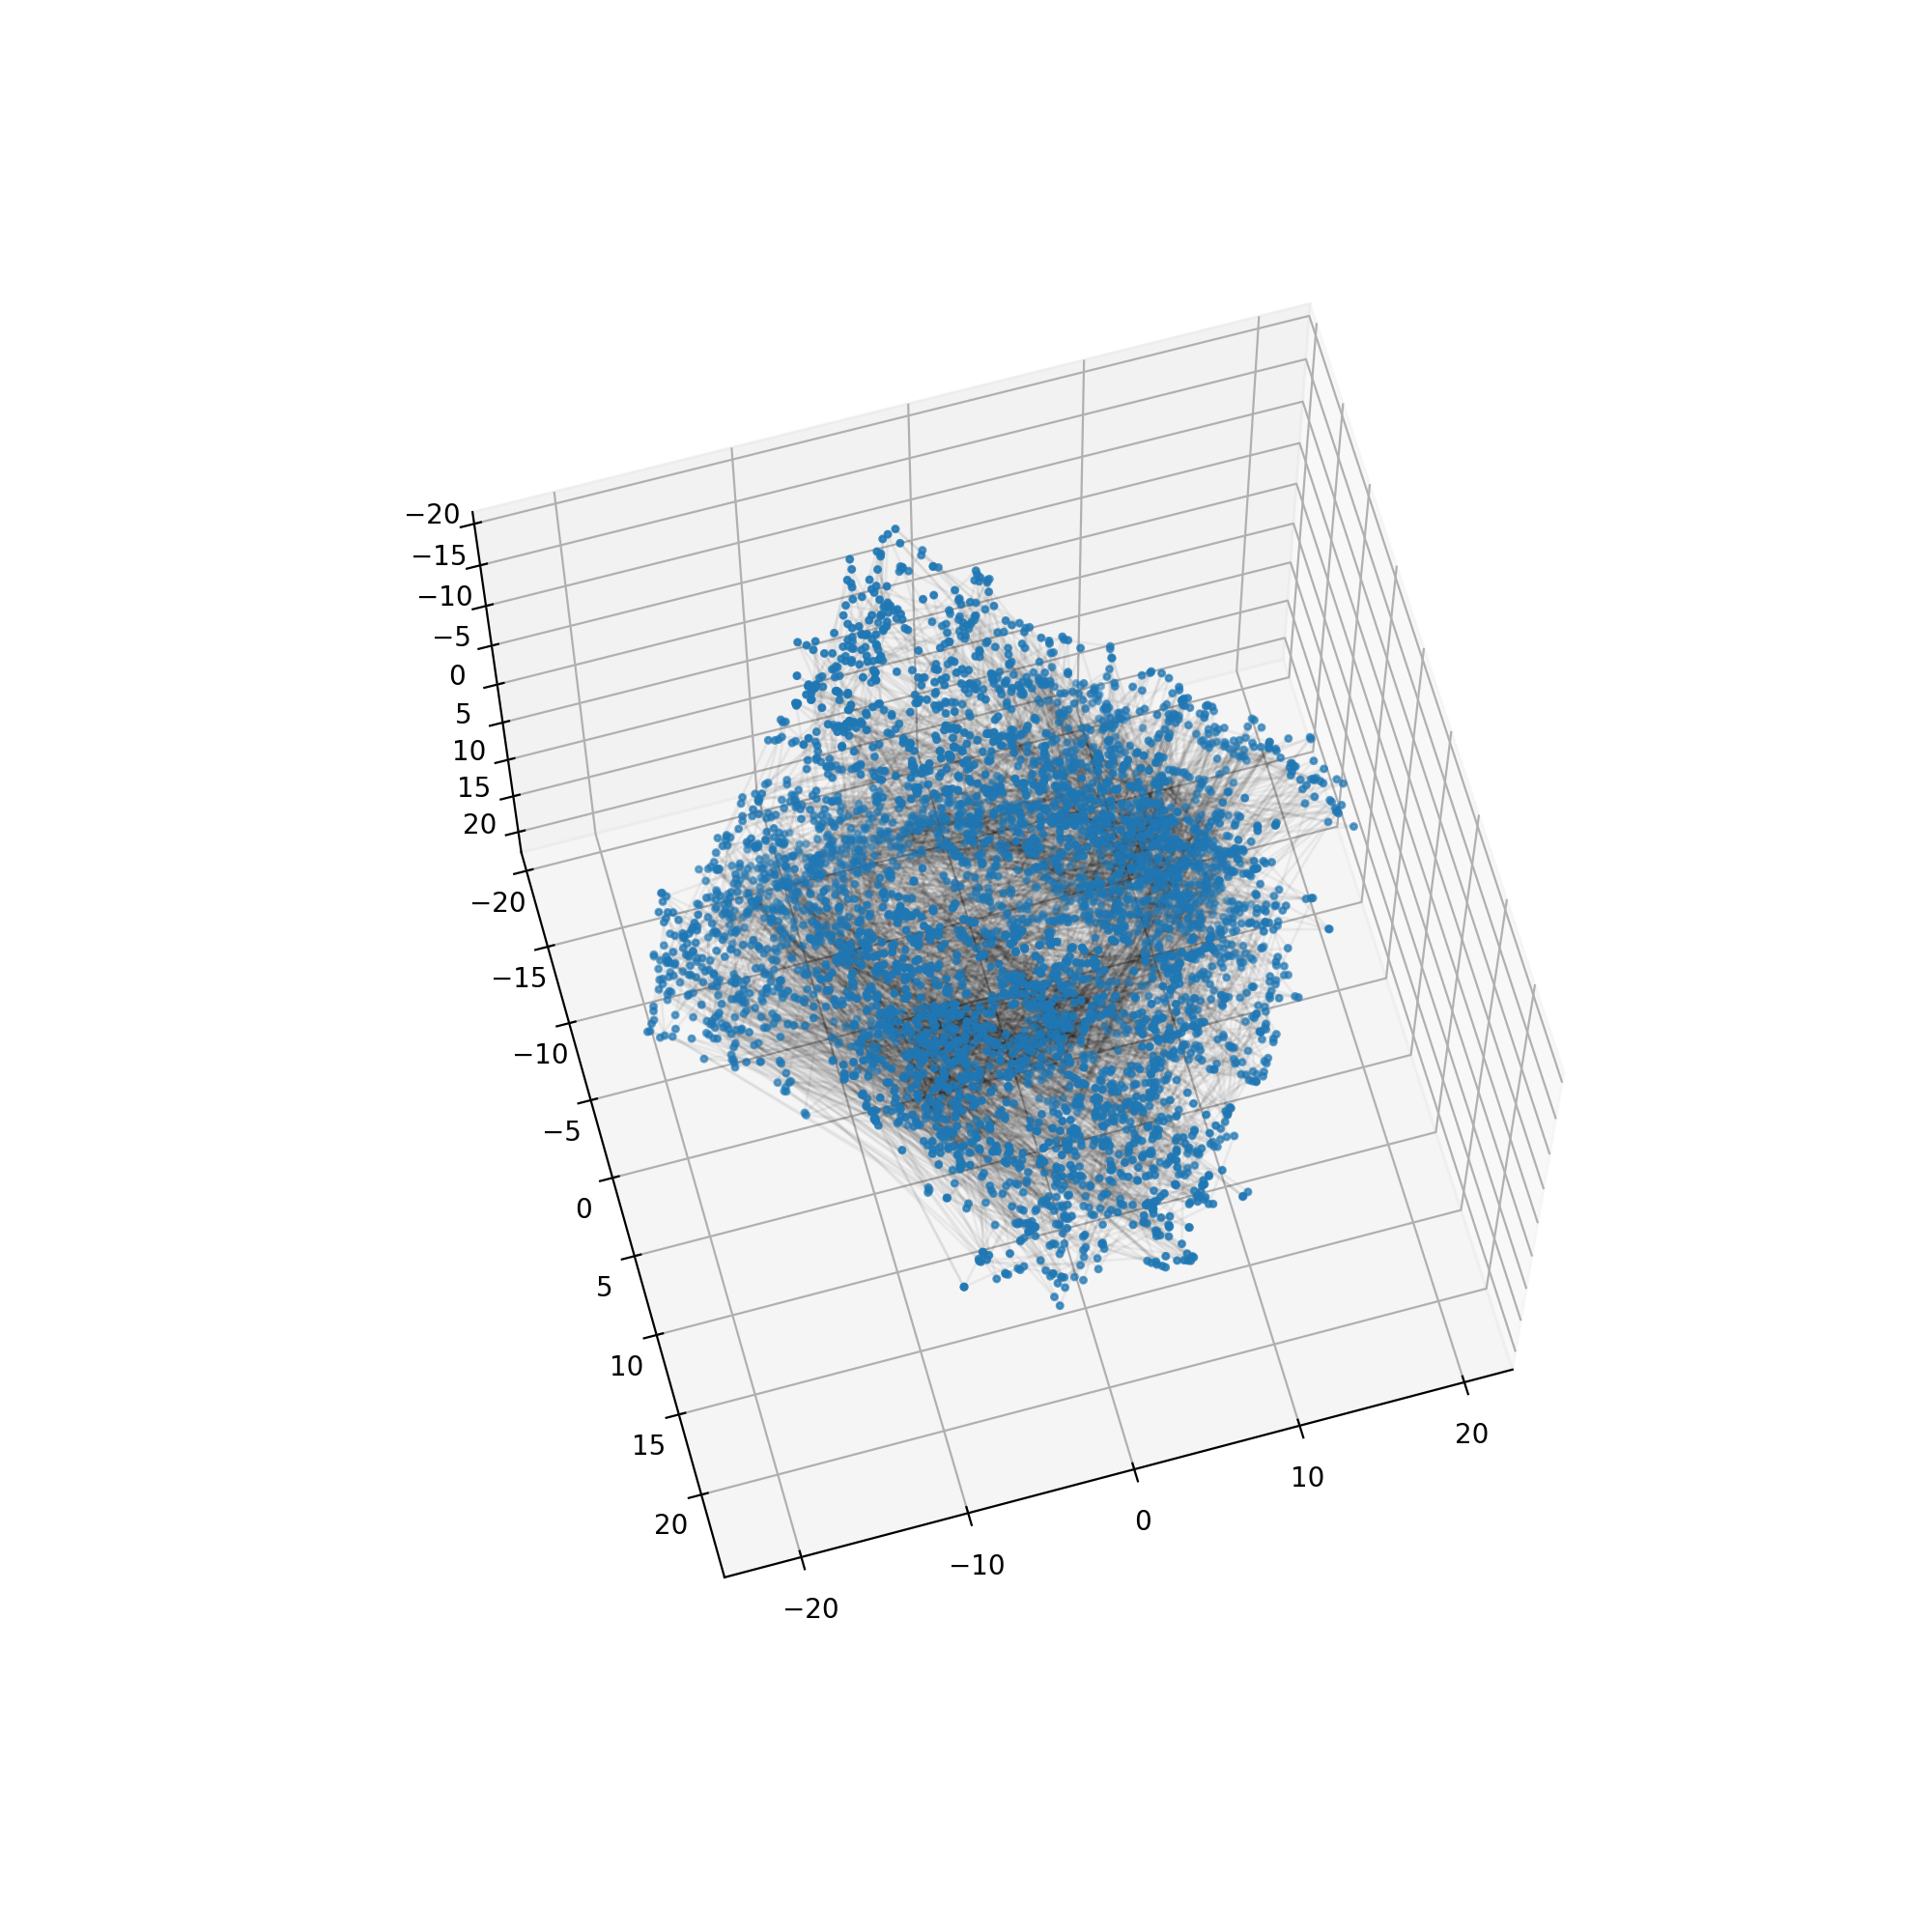

In [41]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2],marker='o',s=5,zorder=1)
for i in range(X.shape[0]-1):
    ax.plot(X[i:i+2,0],
            X[i:i+2,1],
            X[i:i+2,2],
             alpha=0.05,
             lw=1,
             #solid_capstyle='butt',
             c='k',
             zorder=0)

In [ ]:
# CLUSTER

<IPython.core.display.Javascript object>


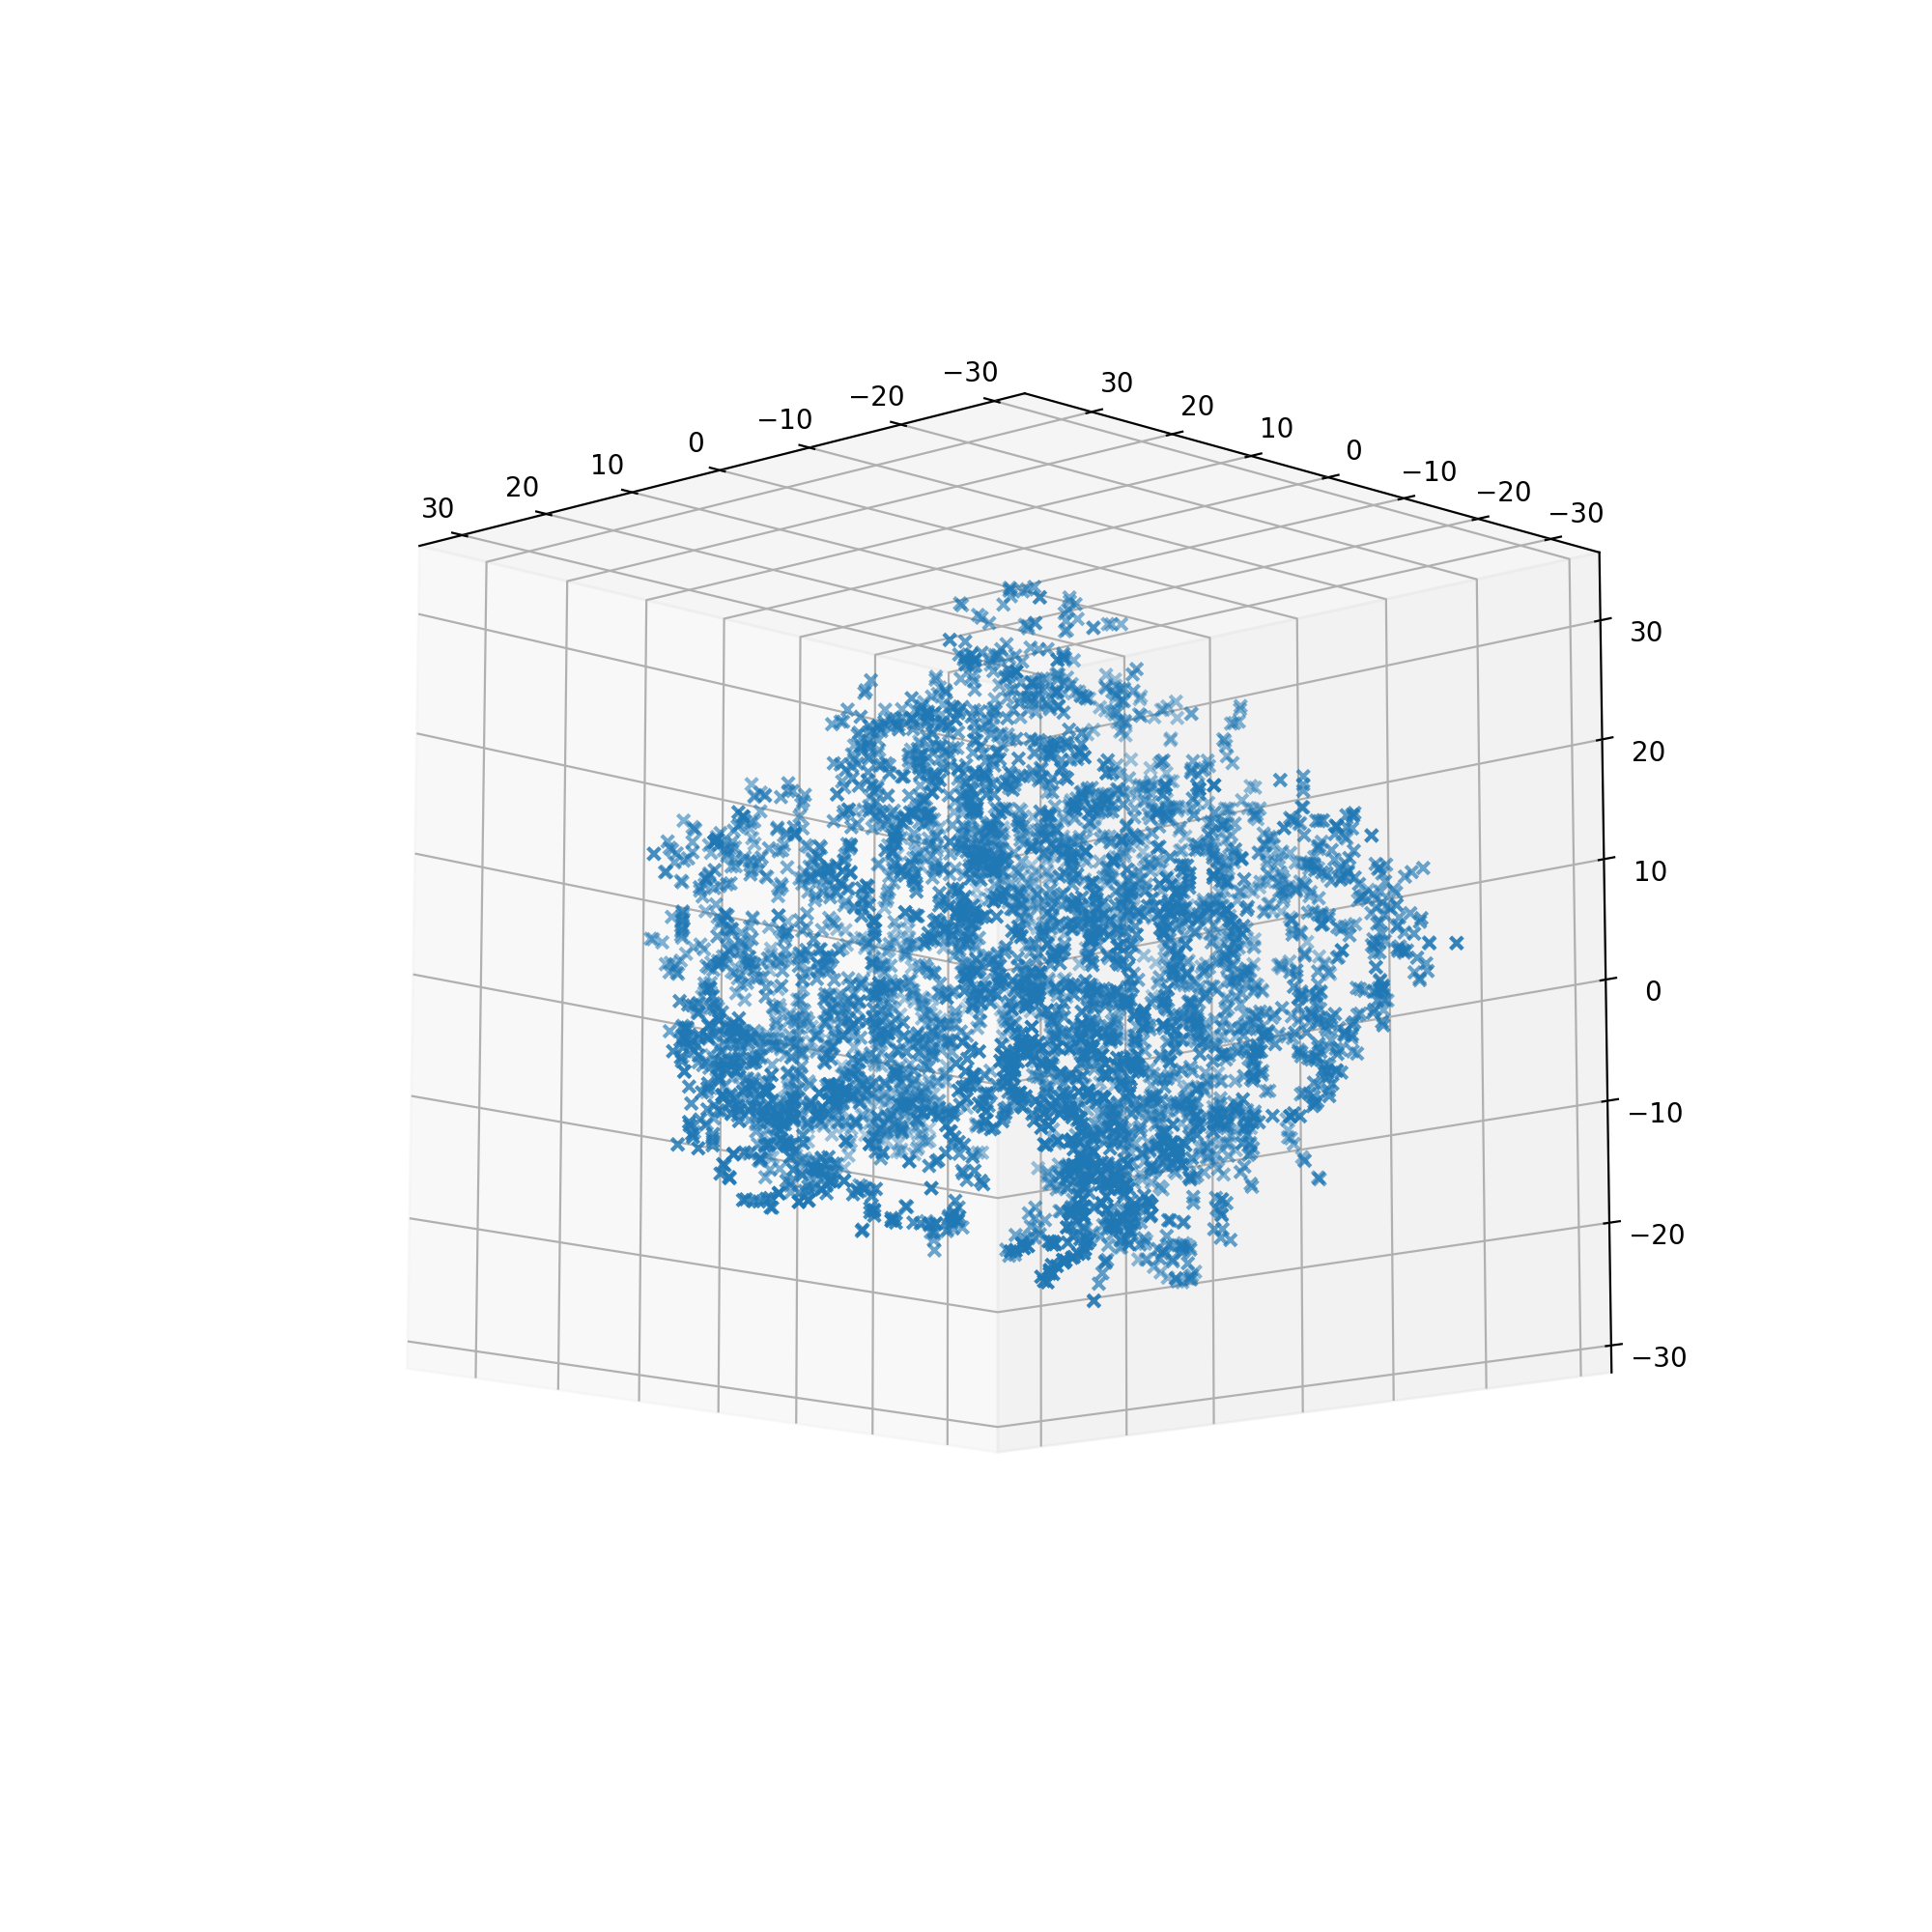

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2],marker='x')

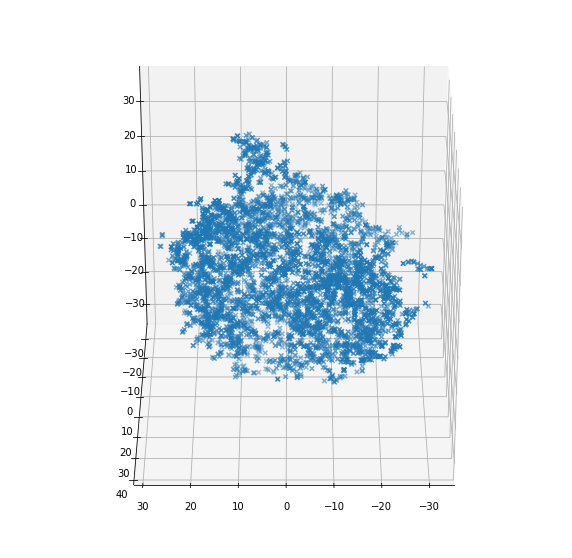

In [216]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2],marker='x')
ax.view_init(30,90)

In [205]:
%matplotlib notebook

ImportError: Failed to import any qt binding

In [93]:
import hdbscan
from random import randint
colors = []

for i in range(100):
    colors.append('#%06X' % randint(0, 0xFFFFFF))